###  Decision Tree :

### Objective :
* Data Loading
* Data Understanding
* Data Cleaning
* Data Pre-Processing
* Data Visualization
* Building Decision Tree Model

### DATA SET : Mobile Price Prediction

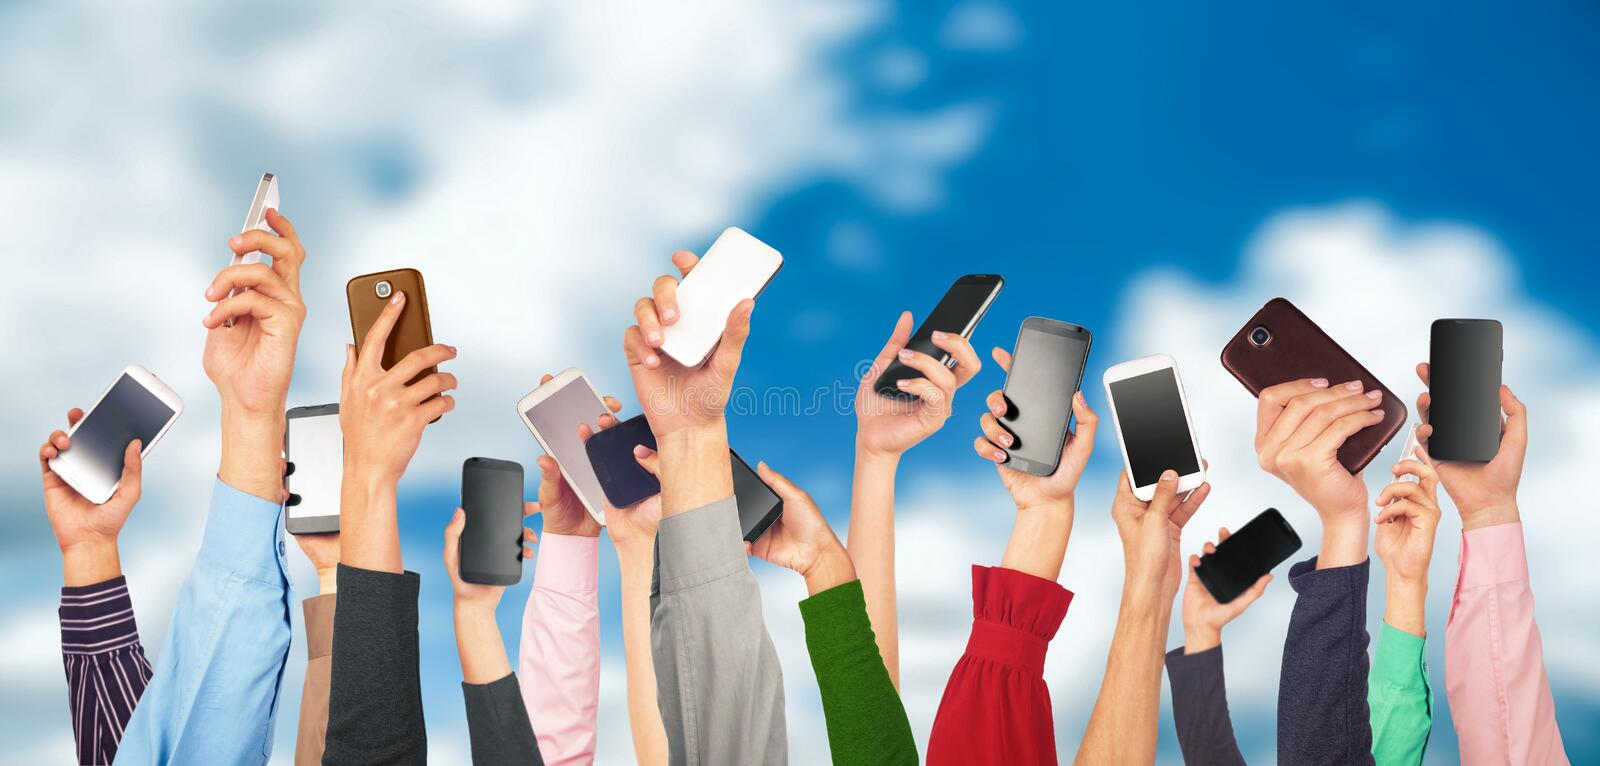

|Variable         |Description                                                                                               |
|---------------- |----------------------------------------------------------------------------------------------------------|
|pc               |Primary Camera mega pixels                                                                                |
|fc               |Front Camera mega pixels                                                                                  |
|sc_h             |Screen Height of mobile in cm                                                                             |
|sc_w             |Screen Width of mobile in cm                                                                              |
|m_dep            |Mobile Depth in cm                                                                                        |
|px_width         |Pixel Resolution Width                                                                                    |
|px_height        |Pixel Resolution Height                                                                                   |
|ram              |Random Access Memory in Mega Bytes                                                                        |
|int_memory       |Internal Memory in Giga Bytes                                                                             |
|four_g           |Has 4G or not                                                                                             |
|three_g          |Has 3G or not                                                                                             |
|dual_sim         |Has dual sim support or not                                                                               |
|battery_power    |Total energy a battery can store in one time measured in mAh                                              |
|touch_screen     |Has touch screen or not                                                                                   |
|clock_speed      |speed at which microprocessor executes instructions                                                       |
|n_cores          |Number of cores of processor                                                                              |
|wifi             |Has wifi or not                                                                                           |
|blue             |Has bluetooth or not                                                                                      |
|mobile_wt        |Weight of mobile phone                                                                                    |
|talk_time        |longest time that a single battery charge will last when you are                                          |
|price_range      |This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost) |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
train=pd.read_csv('mobile_train.csv')
test=pd.read_csv('mobile_test.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

VIEWING THE HEAD OF THE TRAINING DATA :

In [5]:
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

VIEWING THE HEAD OF THE TEST DATA :

In [6]:
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193        3  16        226      1412  3476    12     7   
1    0.8        191        5  12        746       857  3895     6     0   
2    0.9        186        3   4       1270      1366  2396    17    10   
3    0.5         96        8  20        295      1752  3893    10     0   
4    0.5        108        6  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1

SHAPE OF THE TRAIN AND THE TEST DATASETS :

In [7]:
print('Training data shape :',train.shape)
print('Test     data shape :',test.shape)

Training data shape : (2000, 21)
Test     data shape : (1000, 21)


COLUMNS OF THE TRAINING DATA :

In [8]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

COLUMNS OF THE TEST DATA :

In [9]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

CHECKING THE NULL VALUES FOR THE TRAIN AND TEST DATASETS :

In [10]:
## TRAINING DATA :
train.isnull().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

In [11]:
## TEST DATA :
test.isnull().sum().sort_values(ascending=False)

id               0
pc               0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
n_cores          0
battery_power    0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
blue             0
wifi             0
dtype: int64

There are no null values in the Train and the Test datasets

CHECKING THE DTYPES FOR THE COLUMNS :

In [12]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [13]:
test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

VIEWING THE TARGET VARIABLE DISTRIBUTION :

In [14]:
pd.DataFrame(train.price_range.value_counts().sort_values())

price_range
1          500
2          500
3          500
0          500

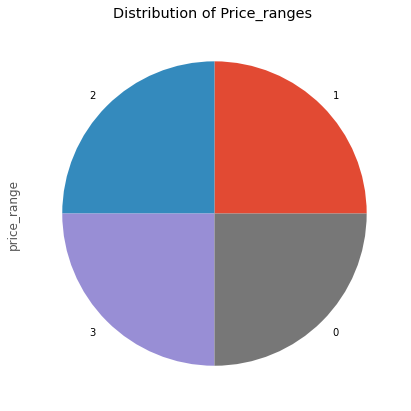

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
train.price_range.value_counts().plot.pie()
plt.title("Distribution of Price_ranges ")
plt.show()

we can see that there is no biasedness in the distribution because it is equally distributed

UNIVARIATE ANALYSIS :

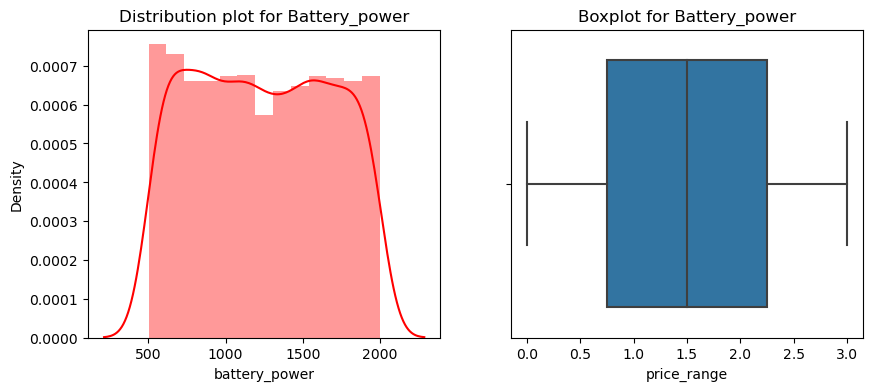

In [16]:
# Let's start looking at one by one columns :
## battery_power :Total energy a battery can store in one time measured in mAh
plt.style.use('default')
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train.battery_power,kde=True,color='r')
plt.title('Distribution plot for Battery_power')

plt.subplot(1,2,2)
sns.boxplot(train.price_range)
plt.title('Boxplot for Battery_power')
plt.show()

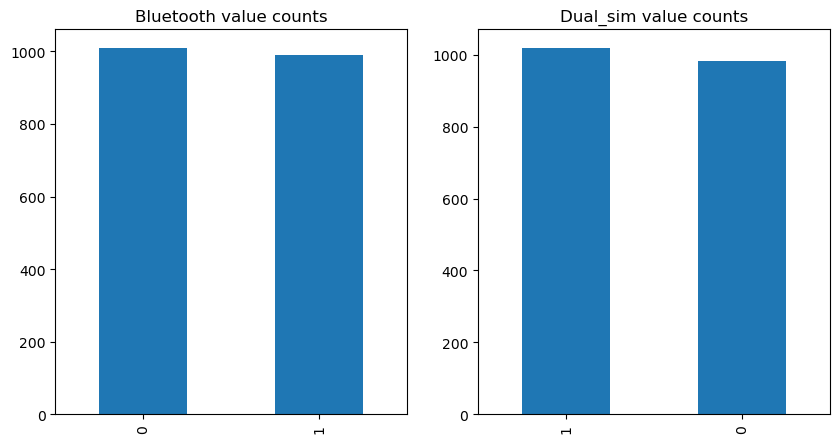

In [17]:
## blue : Has bluetooth or not 
## dual_sim : Has dual sim support or not
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.blue.value_counts().plot.bar()
plt.title('Bluetooth value counts')

plt.subplot(1,2,2)
train.dual_sim.value_counts().plot.bar()
plt.title('Dual_sim value counts')
plt.show()

In [18]:
pd.DataFrame(train.blue.value_counts())

blue
0  1010
1   990

In [19]:
pd.DataFrame(train.dual_sim.value_counts())

dual_sim
1      1019
0       981

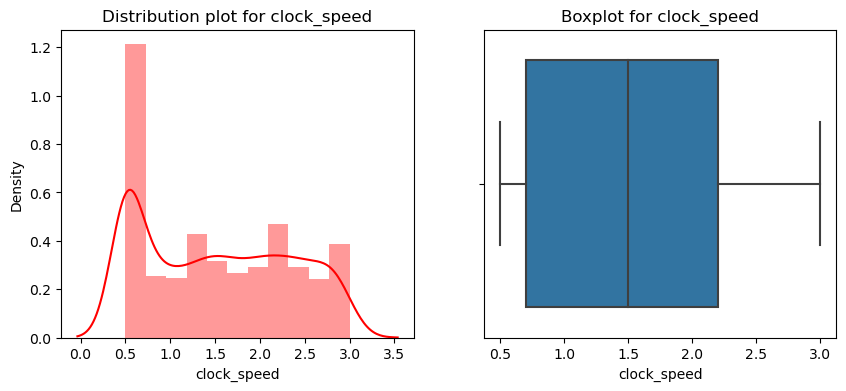

In [20]:
##clock_speed :speed at which microprocessor executes instructions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train.clock_speed,kde=True,color='r')
plt.title('Distribution plot for clock_speed')

plt.subplot(1,2,2)
sns.boxplot(train.clock_speed)
plt.title('Boxplot for clock_speed')
plt.show()

In [21]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

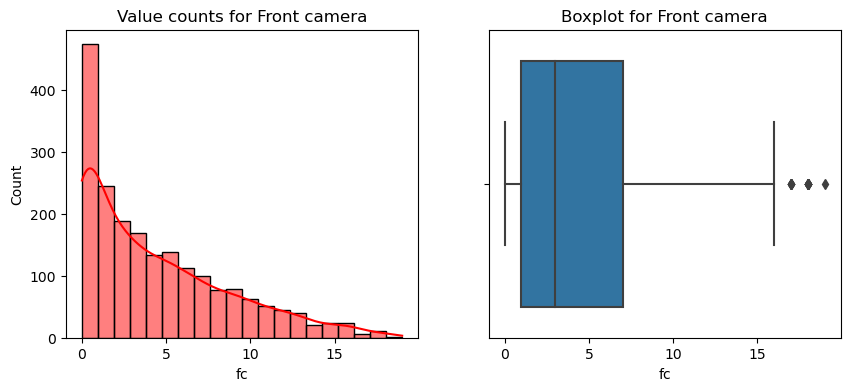

In [22]:
# fc :Front Camera mega pixels 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(train.fc,kde=True,color='r')
plt.title('Value counts for Front camera')

plt.subplot(1,2,2)
sns.boxplot(train.fc)
plt.title('Boxplot for Front camera')
plt.show()


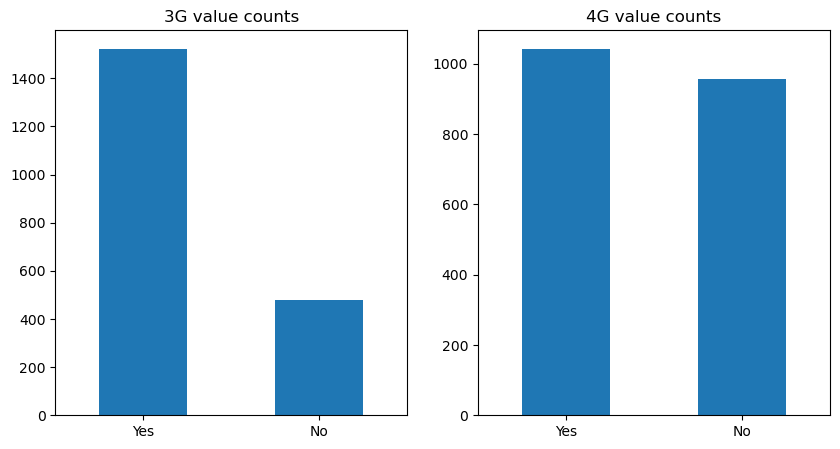

In [23]:
## three_g :Has 3G or not , four_g : Has 4G or not
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.three_g.value_counts().plot.bar()
plt.title('3G value counts')
plt.xticks((1,0),('No',"Yes"),rotation=0)


plt.subplot(1,2,2)
train.four_g.value_counts().plot.bar()
plt.title('4G value counts')
plt.xticks((1,0),('No',"Yes"),rotation=0)
plt.show()

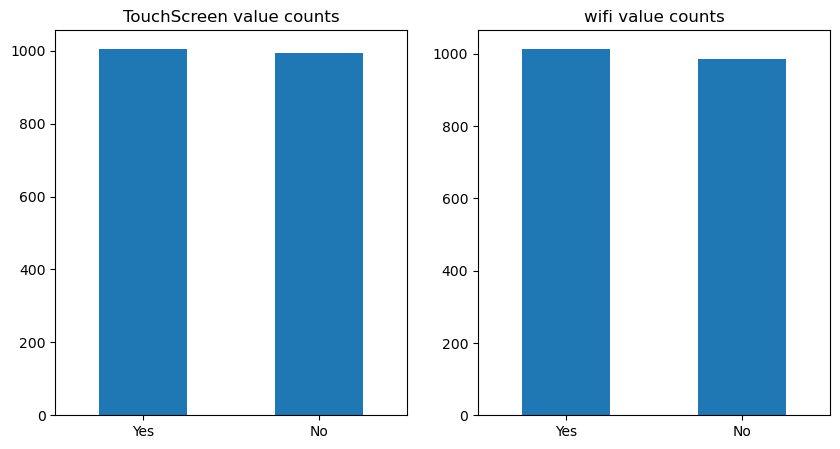

In [24]:
# touch_screen : Has touch screen or not
# wifi : Has wifi or not
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train.touch_screen.value_counts().plot.bar()
plt.xticks((1,0),('No',"Yes"),rotation=0)
plt.title('TouchScreen value counts')

plt.subplot(1,2,2)
train.wifi.value_counts().plot.bar()
plt.title('wifi value counts')
plt.xticks((1,0),('No',"Yes"),rotation=0)
plt.show()


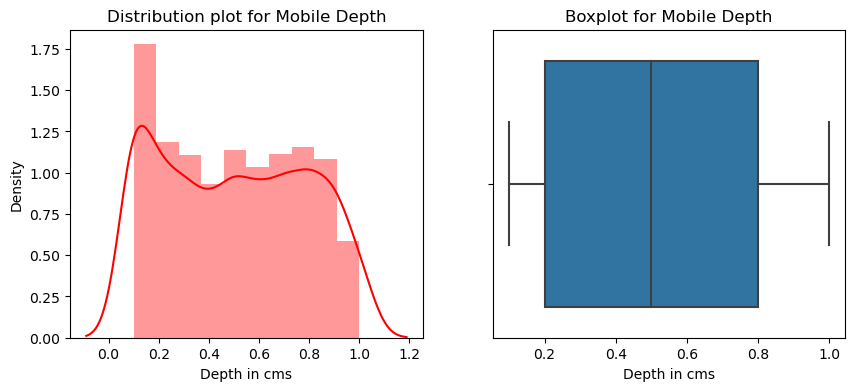

In [25]:
# m-dep : Mobile depth in cms
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train.m_dep,kde=True,color='r')
plt.title('Distribution plot for Mobile Depth')
plt.xlabel('Depth in cms')

plt.subplot(1,2,2)
sns.boxplot(train.m_dep)
plt.title('Boxplot for Mobile Depth')
plt.xlabel('Depth in cms')
plt.show()

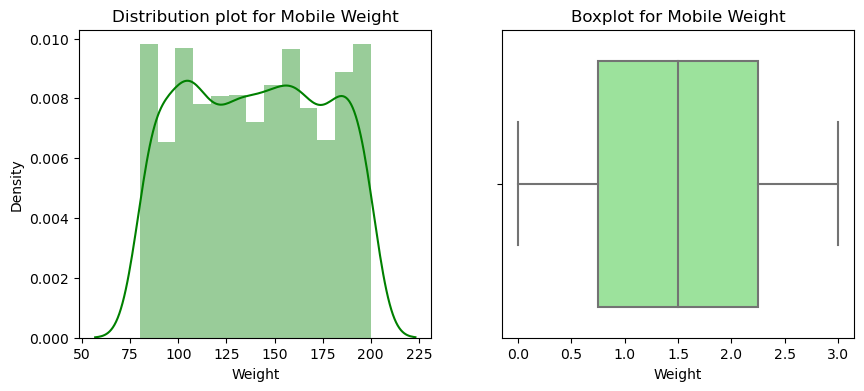

In [26]:
# mobile_wt : Mobile weight
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train.mobile_wt,kde=True,color='g')
plt.title('Distribution plot for Mobile Weight')
plt.xlabel('Weight')

plt.subplot(1,2,2)
sns.boxplot(train.price_range,color='lightgreen')
plt.title('Boxplot for Mobile Weight')
plt.xlabel('Weight')
plt.show()

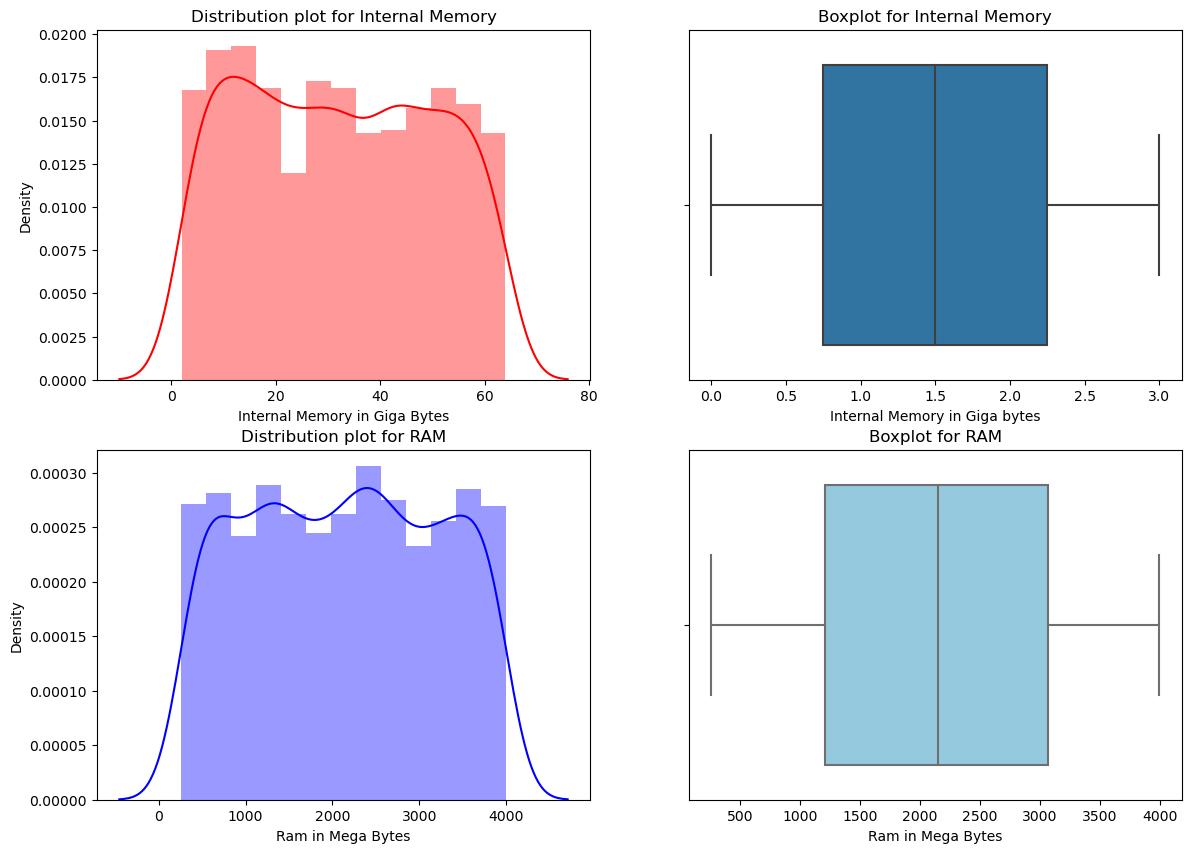

In [27]:
# int_memory : Internal memory in Giga bytes
# ram : Random Access Memory in Mega Bytes
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.distplot(train.int_memory,kde=True,color='r')
plt.title('Distribution plot for Internal Memory')
plt.xlabel('Internal Memory in Giga Bytes\n')

plt.subplot(2,2,2)
sns.boxplot(train.price_range)
plt.title('Boxplot for Internal Memory')
plt.xlabel('Internal Memory in Giga bytes\n')

plt.subplot(2,2,3)
sns.distplot(train.ram,kde=True,color='blue')
plt.title('Distribution plot for RAM')
plt.xlabel('Ram in Mega Bytes')

plt.subplot(2,2,4)
sns.boxplot(train.ram,color='skyblue')
plt.title('Boxplot for RAM')
plt.xlabel('Ram in Mega Bytes')
plt.show()

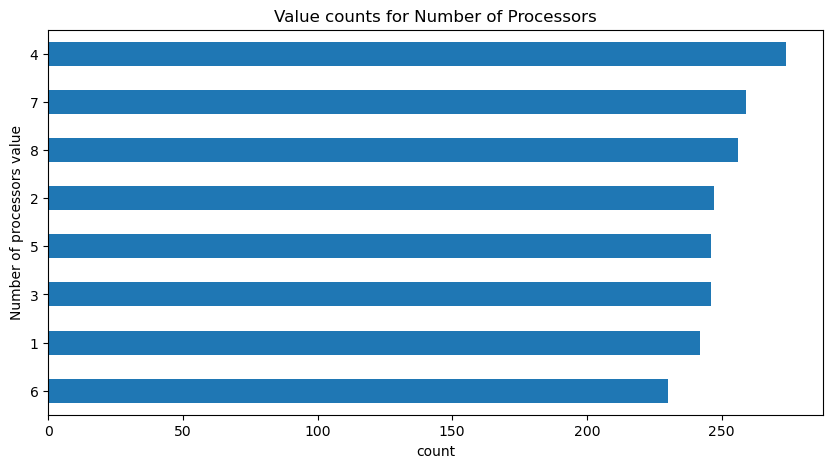

In [28]:
# n-cores : Number of cores of processor
plt.figure(figsize=(10,5))
train.n_cores.value_counts().sort_values().plot.barh()
plt.title('Value counts for Number of Processors')
plt.xlabel('count')
plt.ylabel('Number of processors value')
plt.show()

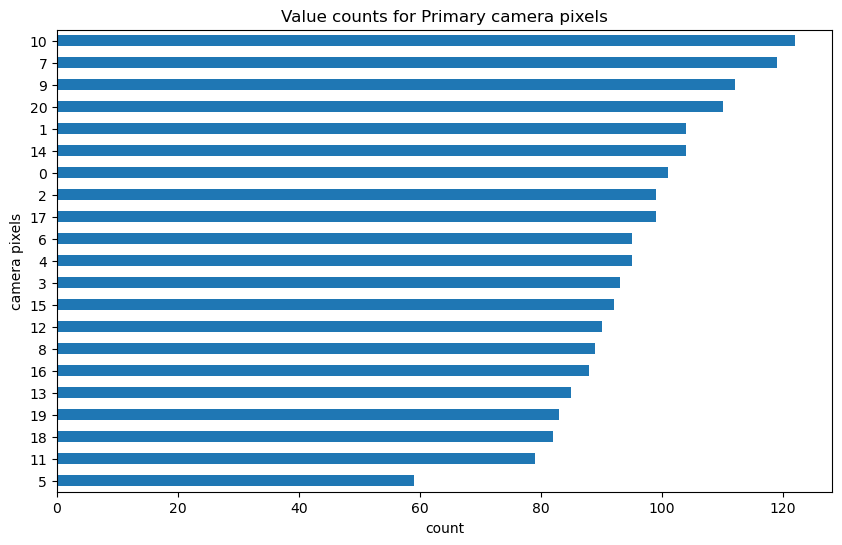

In [29]:
# pc :Primary Camera mega pixels
plt.figure(figsize=(10,6))
train.pc.value_counts().sort_values().plot.barh()
plt.title('Value counts for Primary camera pixels')
plt.xlabel('count')
plt.ylabel('camera pixels')
plt.show()

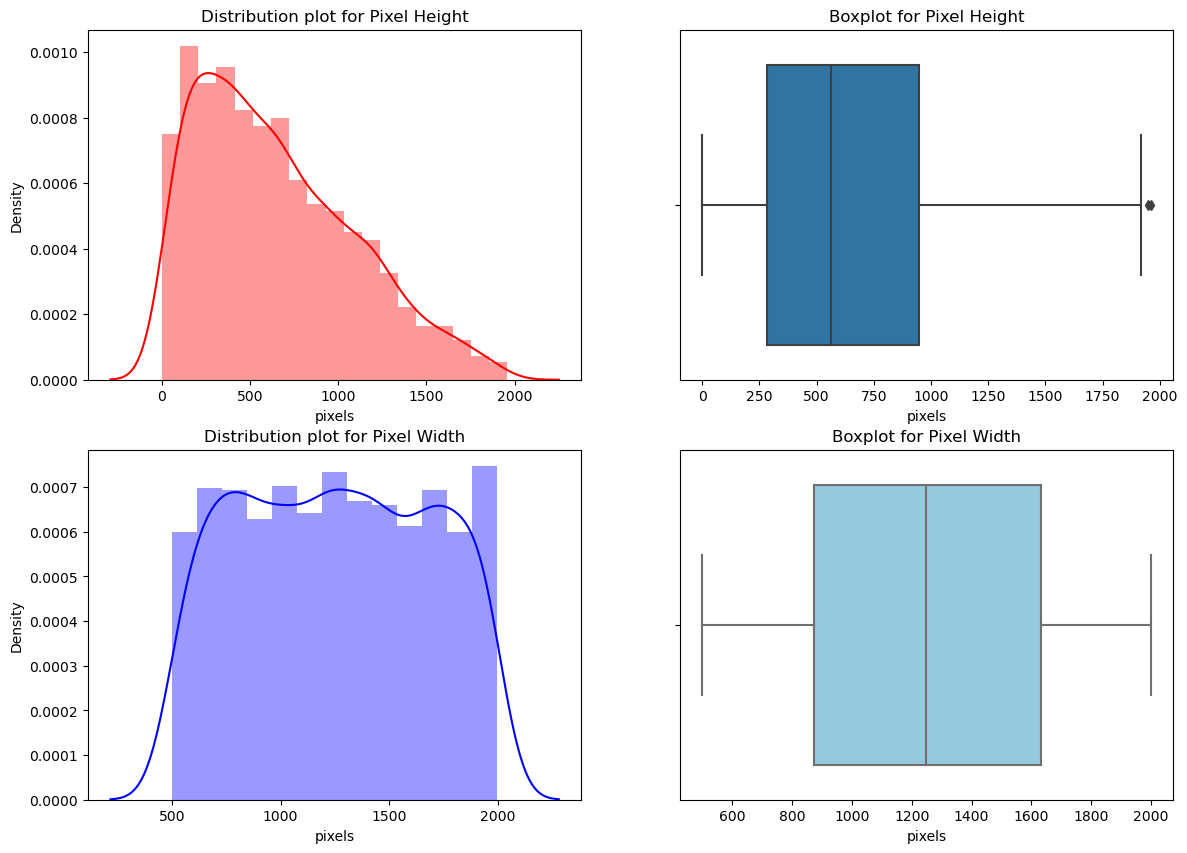

In [30]:
# px-height : pixel Resolution height
# px-width : pixel Resolution width
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.distplot(train.px_height,kde=True,color='r')
plt.title('Distribution plot for Pixel Height')
plt.xlabel('pixels\n')

plt.subplot(2,2,2)
sns.boxplot(train.px_height)
plt.title('Boxplot for Pixel Height')
plt.xlabel('pixels\n')

plt.subplot(2,2,3)
sns.distplot(train.px_width,kde=True,color='blue')
plt.title('Distribution plot for Pixel Width')
plt.xlabel('pixels')

plt.subplot(2,2,4)
sns.boxplot(train.px_width,color='skyblue')
plt.title('Boxplot for Pixel Width')
plt.xlabel('pixels')
plt.show()

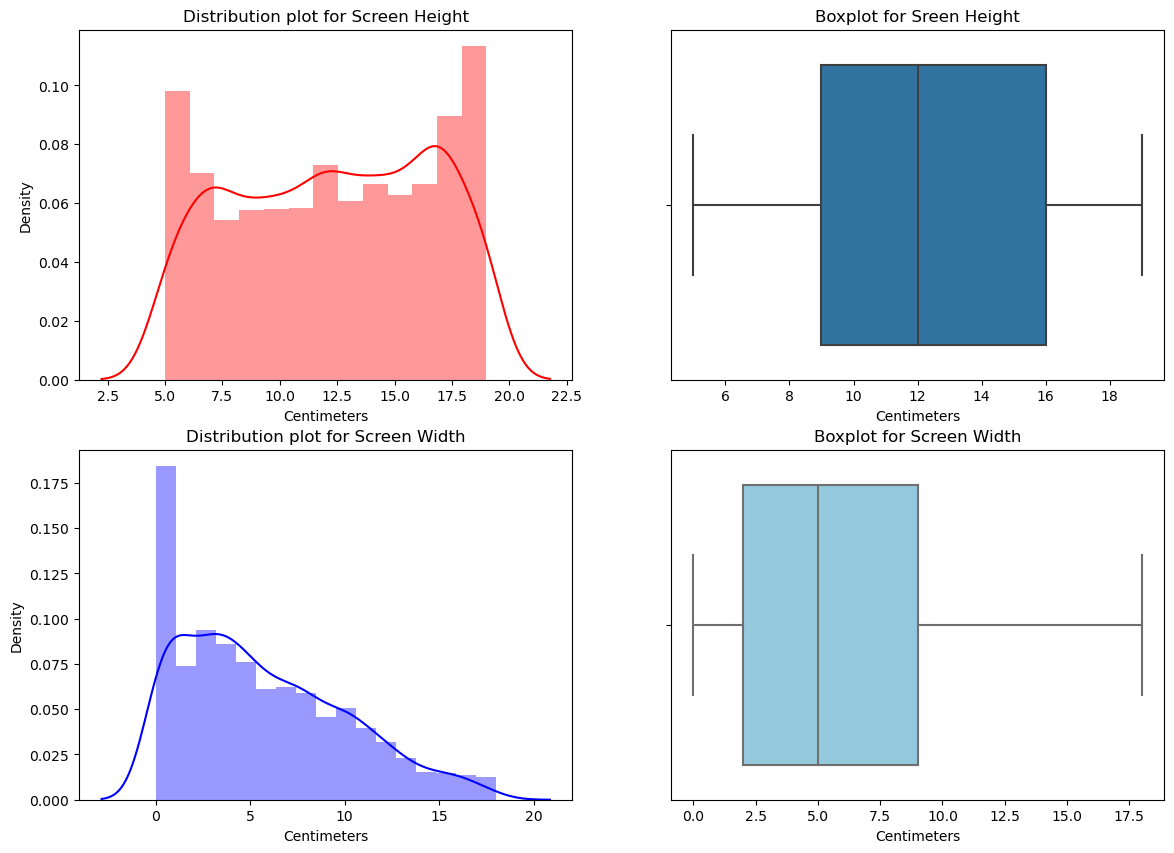

In [31]:
# sc-h : Screen Height of mobile in cm
# sc-w : Screen Width of mobile in cm
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.distplot(train.sc_h,kde=True,color='r')
plt.title('Distribution plot for Screen Height')
plt.xlabel('Centimeters\n')

plt.subplot(2,2,2)
sns.boxplot(train.sc_h)
plt.title('Boxplot for Sreen Height')
plt.xlabel('Centimeters\n')

plt.subplot(2,2,3)
sns.distplot(train.sc_w,kde=True,color='blue')
plt.title('Distribution plot for Screen Width')
plt.xlabel('Centimeters')

plt.subplot(2,2,4)
sns.boxplot(train.sc_w,color='skyblue')
plt.title('Boxplot for Screen Width')
plt.xlabel('Centimeters')
plt.show()

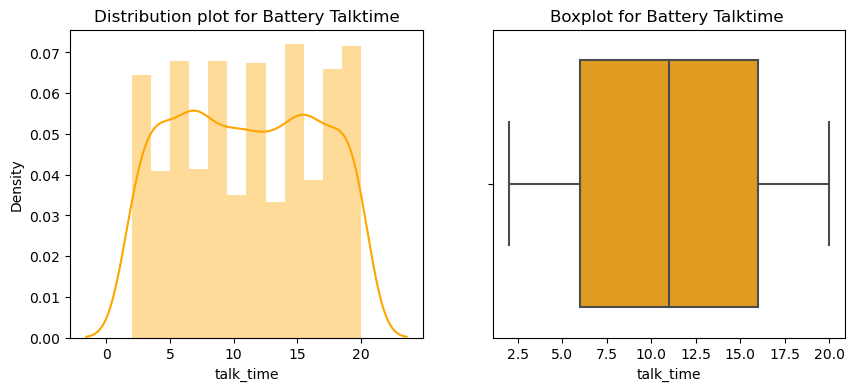

In [32]:
# talktime : longest time that a single battery charge will last when you are.
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train.talk_time,kde=True,color='orange')
plt.title('Distribution plot for Battery Talktime')

plt.subplot(1,2,2)
sns.boxplot(train.talk_time,color='orange')
plt.title('Boxplot for Battery Talktime ')
plt.show()

BIVARIATE ANALYSIS :

In [33]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

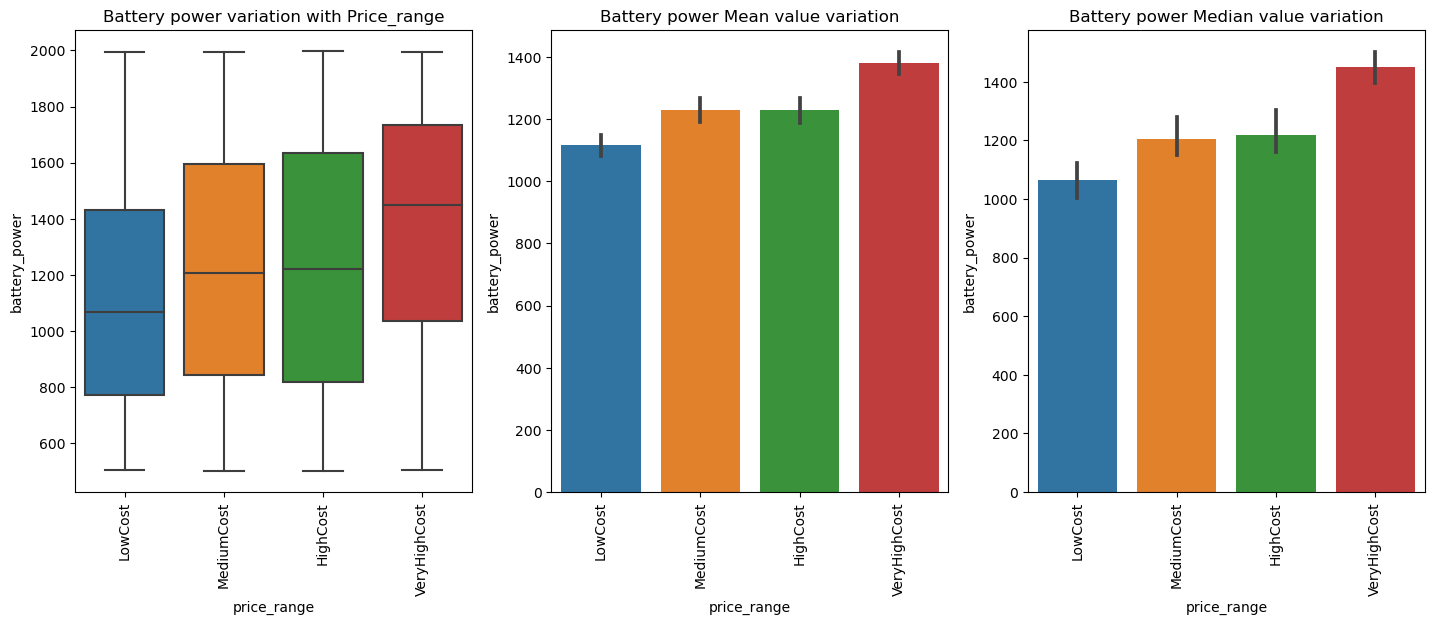

In [34]:
# Price range vs Battery power :
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(train.price_range,train.battery_power)
plt.title('Battery power variation with Price_range')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,2)
sns.barplot(data=train,x='price_range',y='battery_power')
plt.title('Battery power Mean value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,3)
sns.barplot(data=train,x='price_range',y='battery_power',estimator=np.median)
plt.title('Battery power Median value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)
plt.subplots_adjust(left=0.1, right=1)
plt.show()

As we can observe that the when we increase the price_range the better battery power we will get.
The Mean and the Median values of the Battery power increases with the increase in the price_range
Also there is not that much difference between the MediumCost and HighCost battery_power.

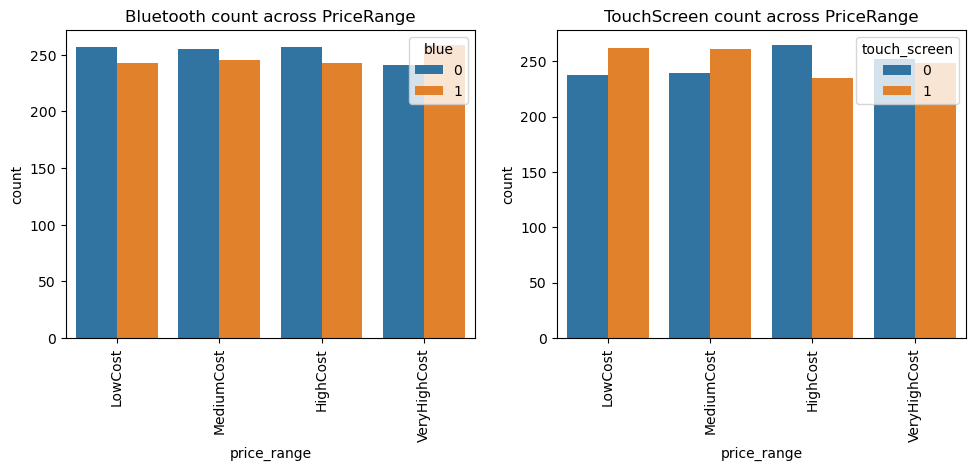

In [35]:
# Bluetooth vs price_range
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=train,x='price_range',hue='blue')
plt.title('Bluetooth count across PriceRange')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=train,x='price_range',hue='touch_screen')
plt.title('TouchScreen count across PriceRange')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplots_adjust(left=0.1, right=1)
plt.show()

There are somewhat equal Distribution of  Mobiles having Bluetooth and Touchscreen.

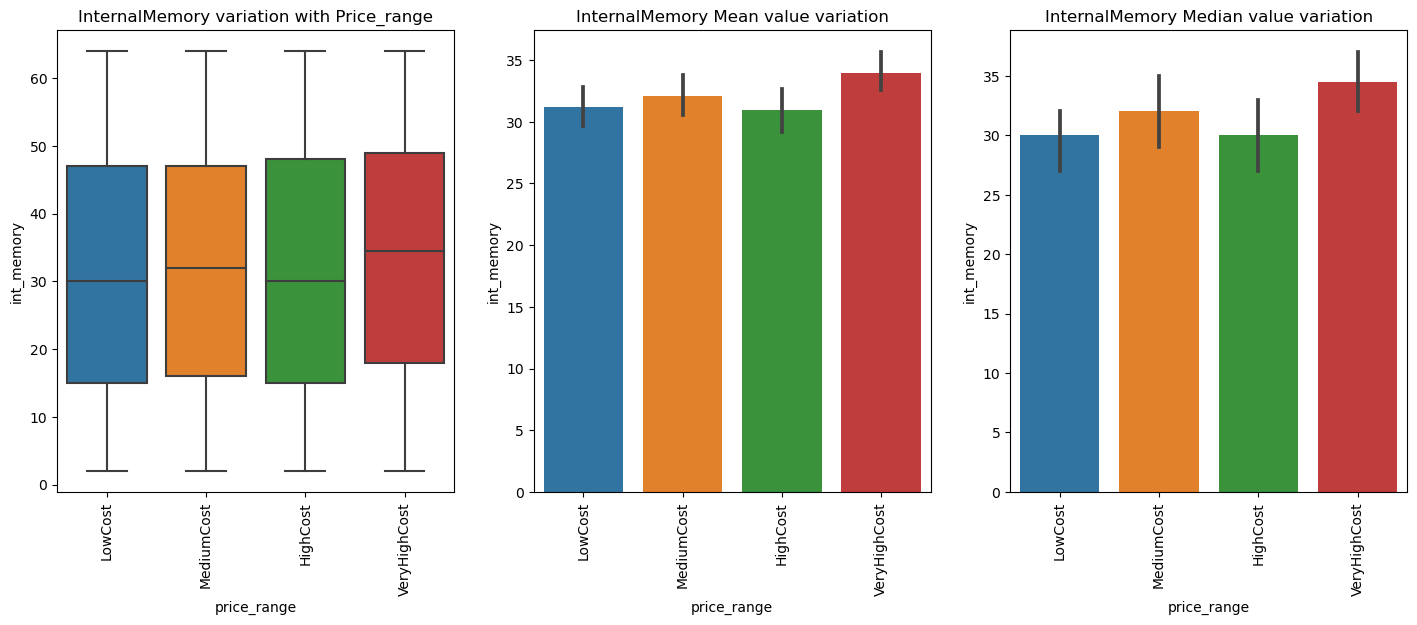

In [36]:
## Internal memory vs price_range
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(train.price_range,train.int_memory)
plt.title('InternalMemory variation with Price_range')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,2)
sns.barplot(data=train,x='price_range',y='int_memory')
plt.title('InternalMemory Mean value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,3)
sns.barplot(data=train,x='price_range',y='int_memory',estimator=np.median)
plt.title('InternalMemory Median value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)
plt.subplots_adjust(left=0.1, right=1)
plt.show()

There is not that much variation in the Mean and the Median values of the InternalMemory with the Price_range

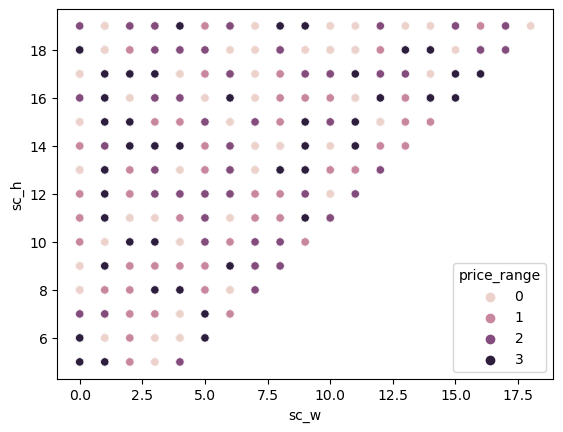

In [37]:
sns.scatterplot(train.sc_w,train.sc_h,hue=train.price_range)
plt.show()

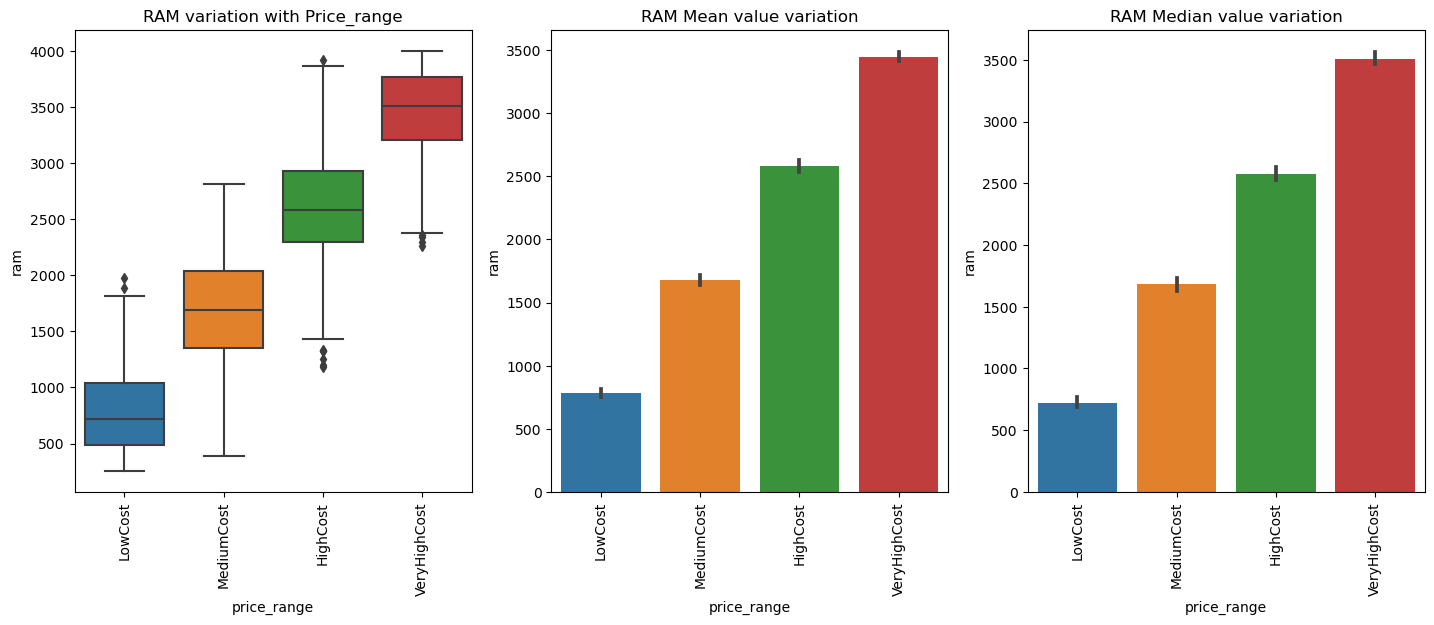

In [38]:
## RAM vs price_range
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(train.price_range,train.ram)
plt.title('RAM variation with Price_range')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,2)
sns.barplot(data=train,x='price_range',y='ram')
plt.title('RAM Mean value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,3)
sns.barplot(data=train,x='price_range',y='ram',estimator=np.median)
plt.title('RAM Median value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)
plt.subplots_adjust(left=0.1, right=1)
plt.show()

As we can observe that The RAM increases with the increase in the Price_Range.

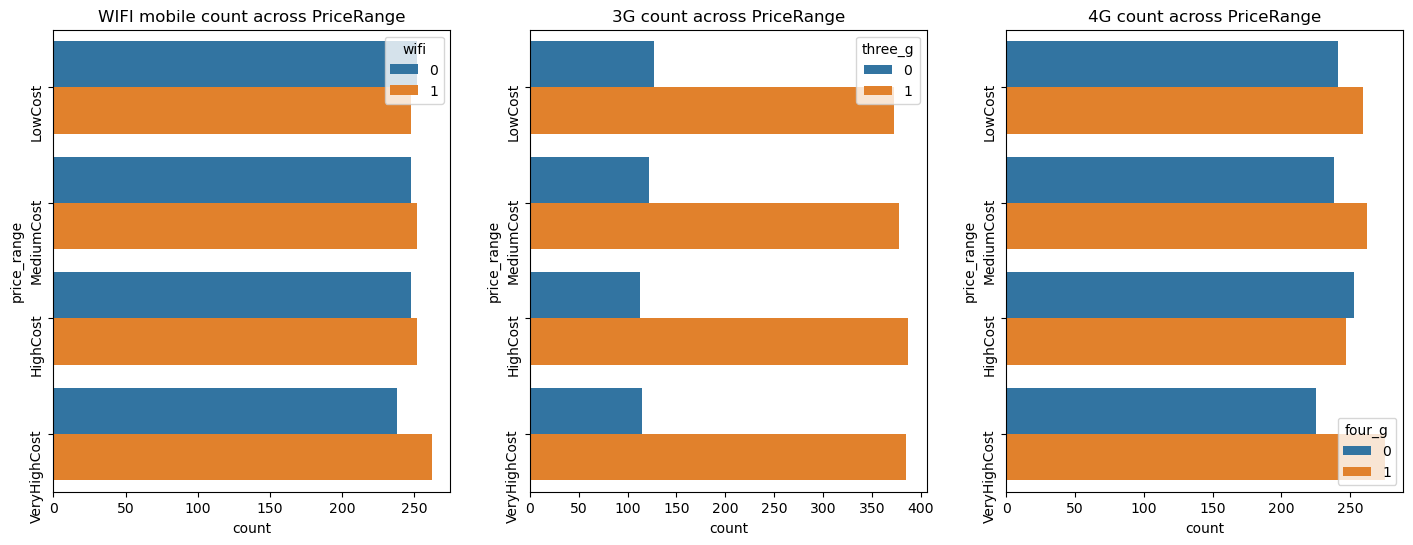

In [39]:
## WIFI ,3G , 4G vs Price_range
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data=train,y='price_range',hue='wifi')
plt.title('WIFI mobile count across PriceRange')
plt.yticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,2)
sns.countplot(data=train,y='price_range',hue='three_g')
plt.title('3G count across PriceRange')
plt.yticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,3)
sns.countplot(data=train,y='price_range',hue='four_g')
plt.title('4G count across PriceRange')
plt.yticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplots_adjust(left=0.1, right=1)
plt.show()

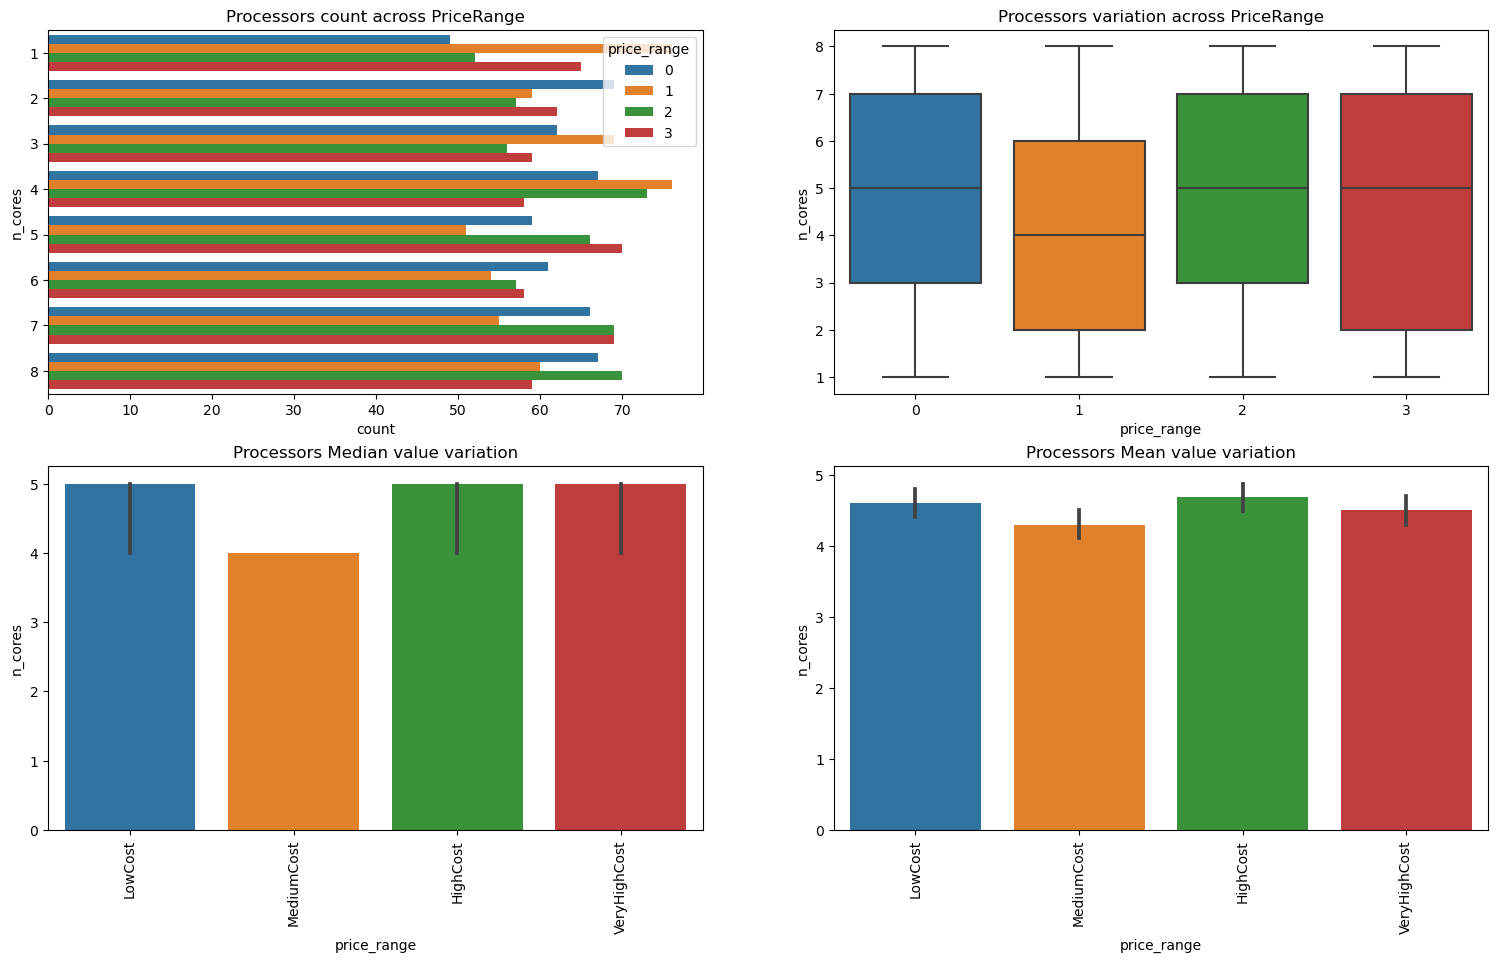

In [40]:
# n_cores vs price_range :
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.countplot(data=train,y='n_cores',hue='price_range')
plt.title('Processors count across PriceRange')

plt.subplot(2,2,2)
sns.boxplot(y=train.n_cores,x=train.price_range)
plt.title("Processors variation across PriceRange")


plt.subplot(2,2,3)
sns.barplot(data=train,x='price_range',y='n_cores',estimator=np.median)
plt.title("Processors Median value variation")
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(2,2,4)
sns.barplot(data=train,x='price_range',y='n_cores')
plt.title("Processors Mean value variation")
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)
plt.subplots_adjust(left=0.1, right=0.9,top=2,bottom=1)
plt.show()

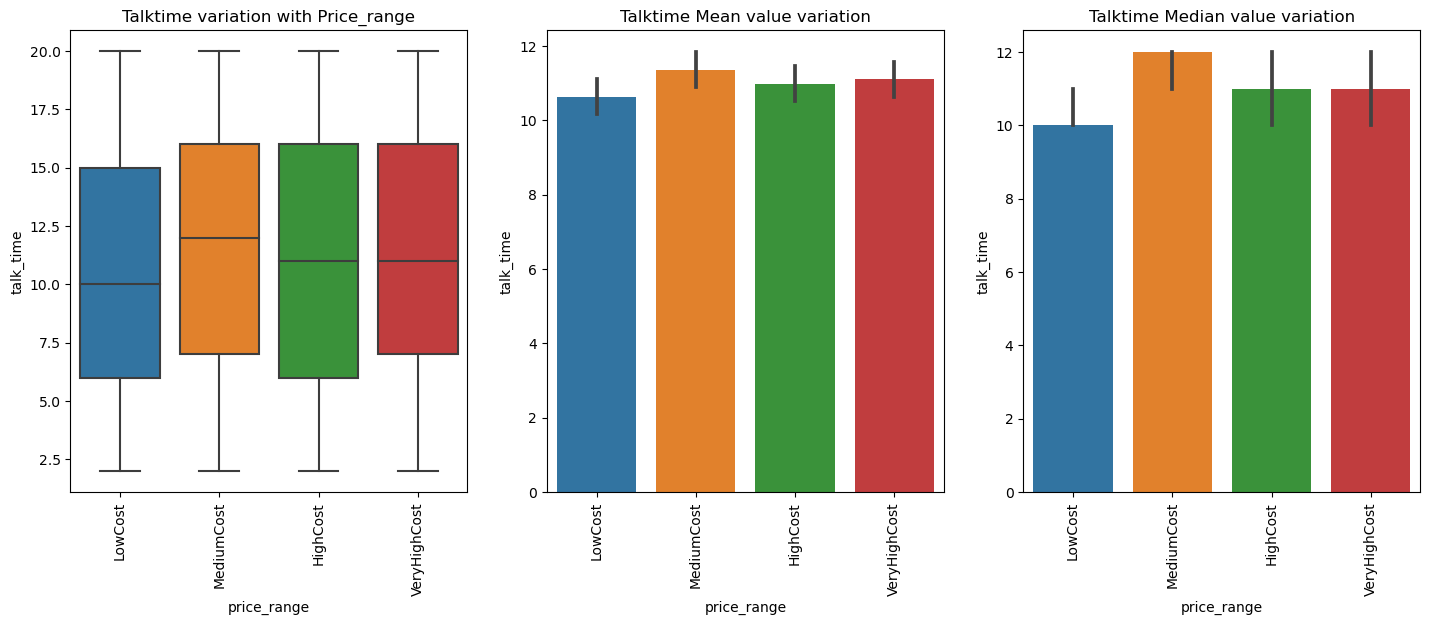

In [41]:
# Talktime vs PriceRange :
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(train.price_range,train.talk_time)
plt.title('Talktime variation with Price_range')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,2)
sns.barplot(data=train,x='price_range',y='talk_time')
plt.title('Talktime Mean value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)

plt.subplot(1,3,3)
sns.barplot(data=train,x='price_range',y='talk_time',estimator=np.median)
plt.title('Talktime Median value variation')
plt.xticks((0,1,2,3),('LowCost','MediumCost','HighCost','VeryHighCost'),rotation=90)
plt.subplots_adjust(left=0.1, right=1)
plt.show()

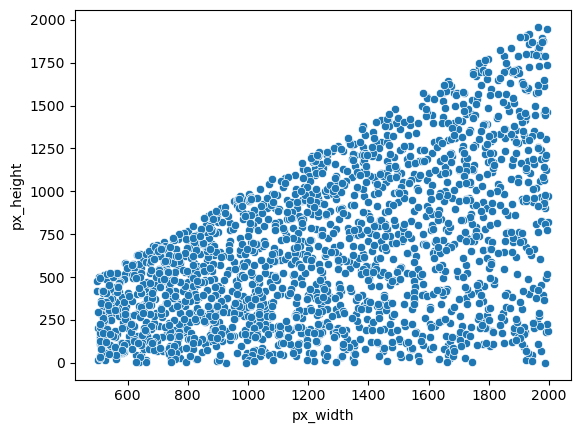

In [42]:
sns.scatterplot(train.px_width,train.px_height)
plt.show()

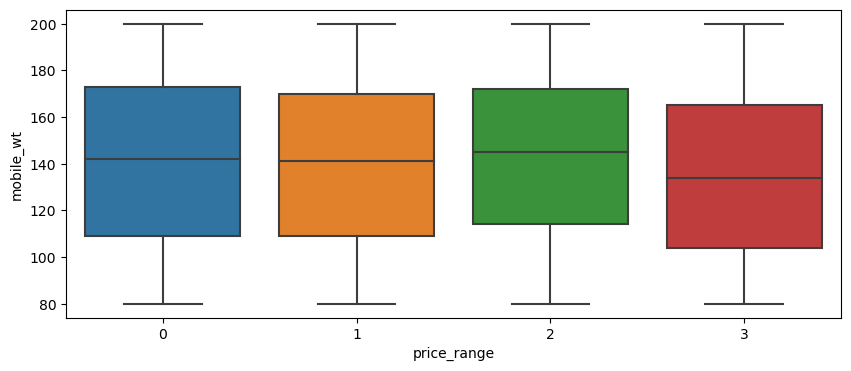

In [43]:
# Mobile_wt vs price_range :
plt.figure(figsize=(10,4))
sns.boxplot(train.price_range,train.mobile_wt)
plt.show()

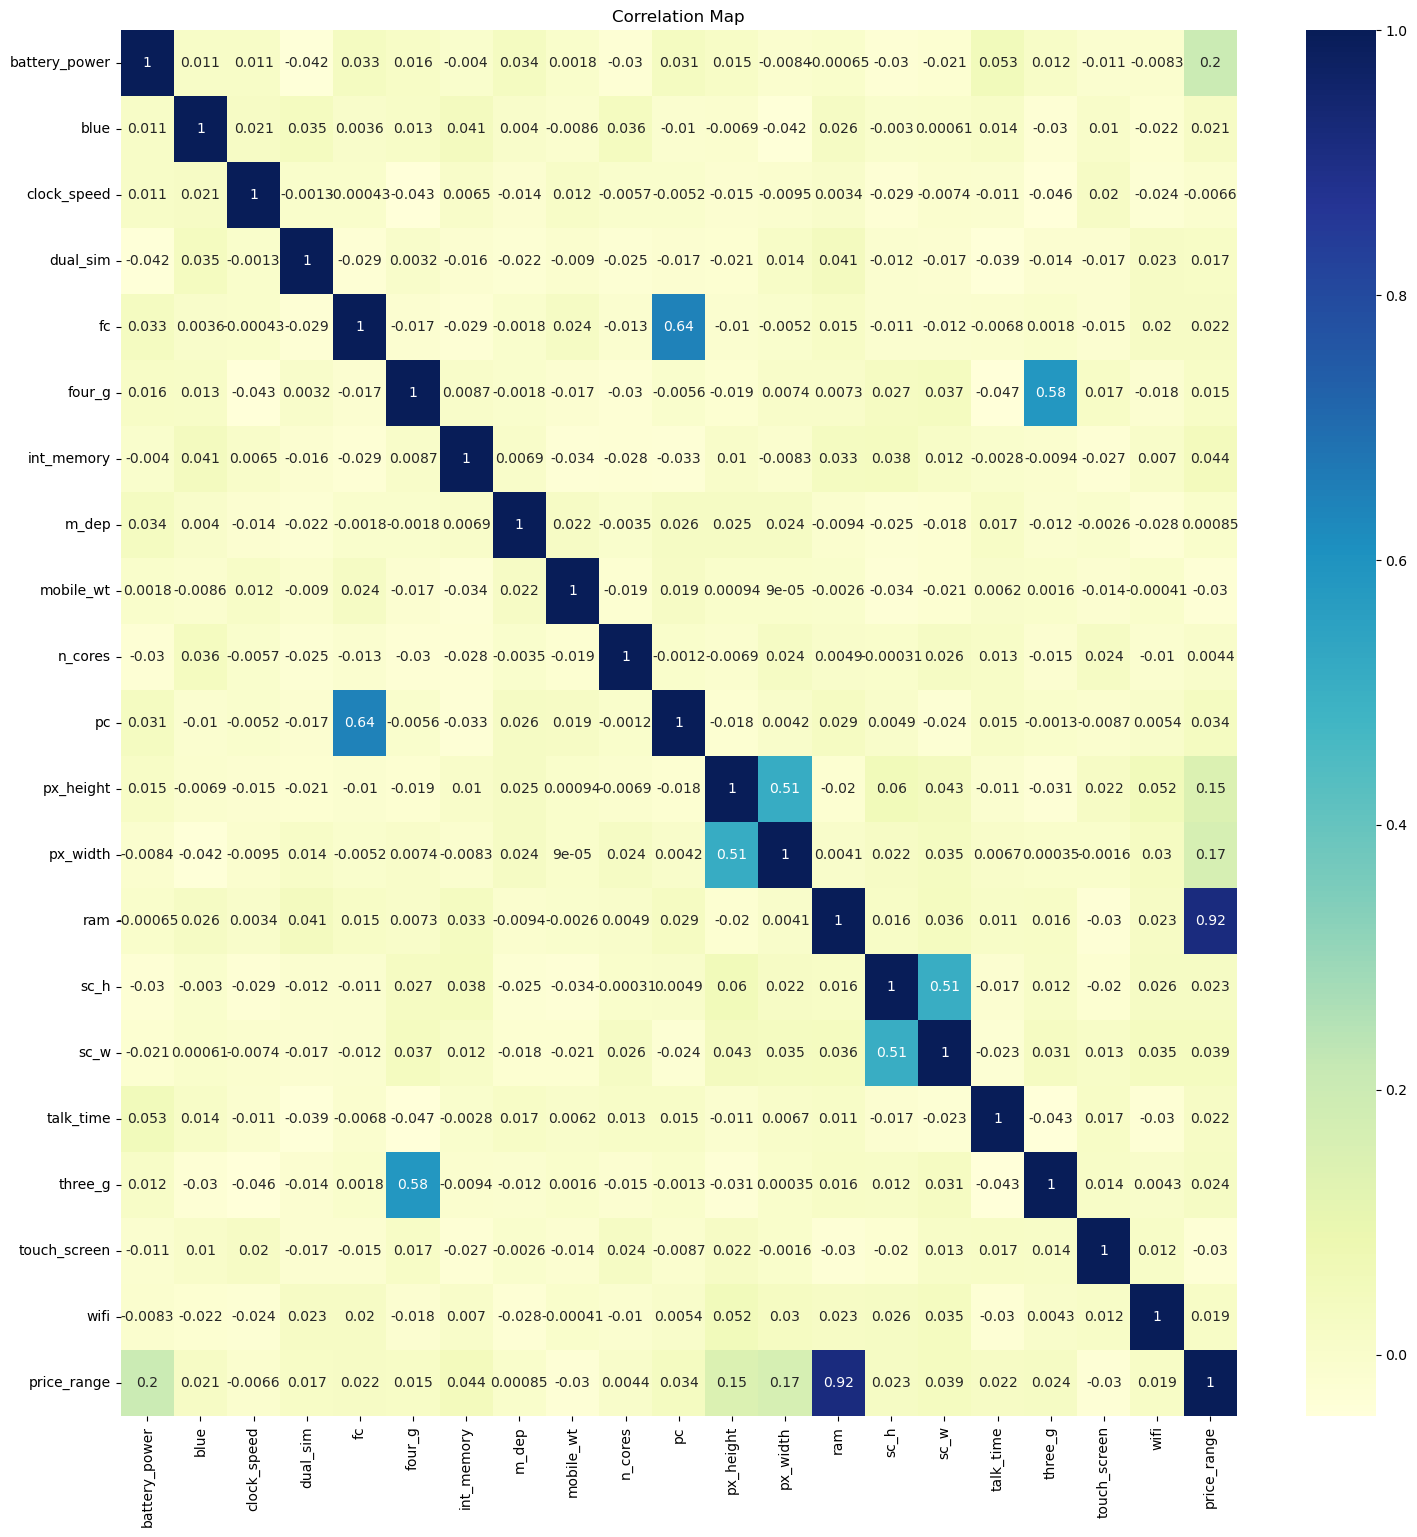

In [44]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),cmap="YlGnBu", annot=True)
plt.title("Correlation Map")
plt.show()

In [45]:
objcols=['blue','dual_sim','four_g','three_g','touch_screen', 'wifi', 'price_range']
numcols=train.loc[:,~train.columns.isin(objcols)]
numcols.head()

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  
0         20       756  2549     9     7         19  
1        905      1988  2631    17     3          7  
2       1263      1716  2603    11     2          9  
3       1216      1786  2769    16     8         11  
4       1208      1212  1411     8     2         15

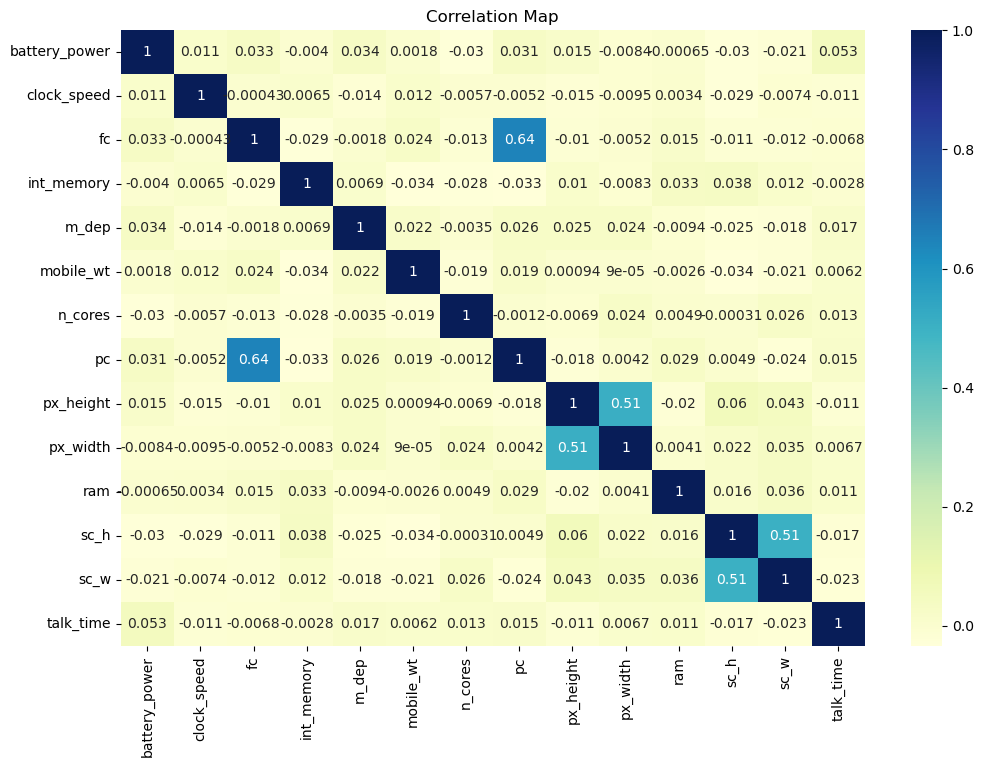

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(numcols.corr(),cmap="YlGnBu", annot=True)
plt.title("Correlation Map")
plt.show()

As we can observe that the 'fc':FrontCamera MegaPixels and the 'pc':PrimaryCameraMegapixels are somewhat correlated
Next to it are 'px_height' and 'px_width'  and the 'sc_h' and 'sc_w'.

Train_ Test Split :

In [47]:
X=train.drop('price_range',axis=1)
X.head()
X.shape

(2000, 20)

In [48]:
y=train.price_range
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

Buiding the Base Model using all the Features :

In [49]:
## Import the train_test split
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42,stratify=y)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree=DecisionTreeClassifier(criterion='entropy')

In [53]:
tree_model=tree.fit(X_train,y_train)

In [54]:
print("Train set Accuracy :",tree_model.score(X_train,y_train))

Train set Accuracy : 1.0


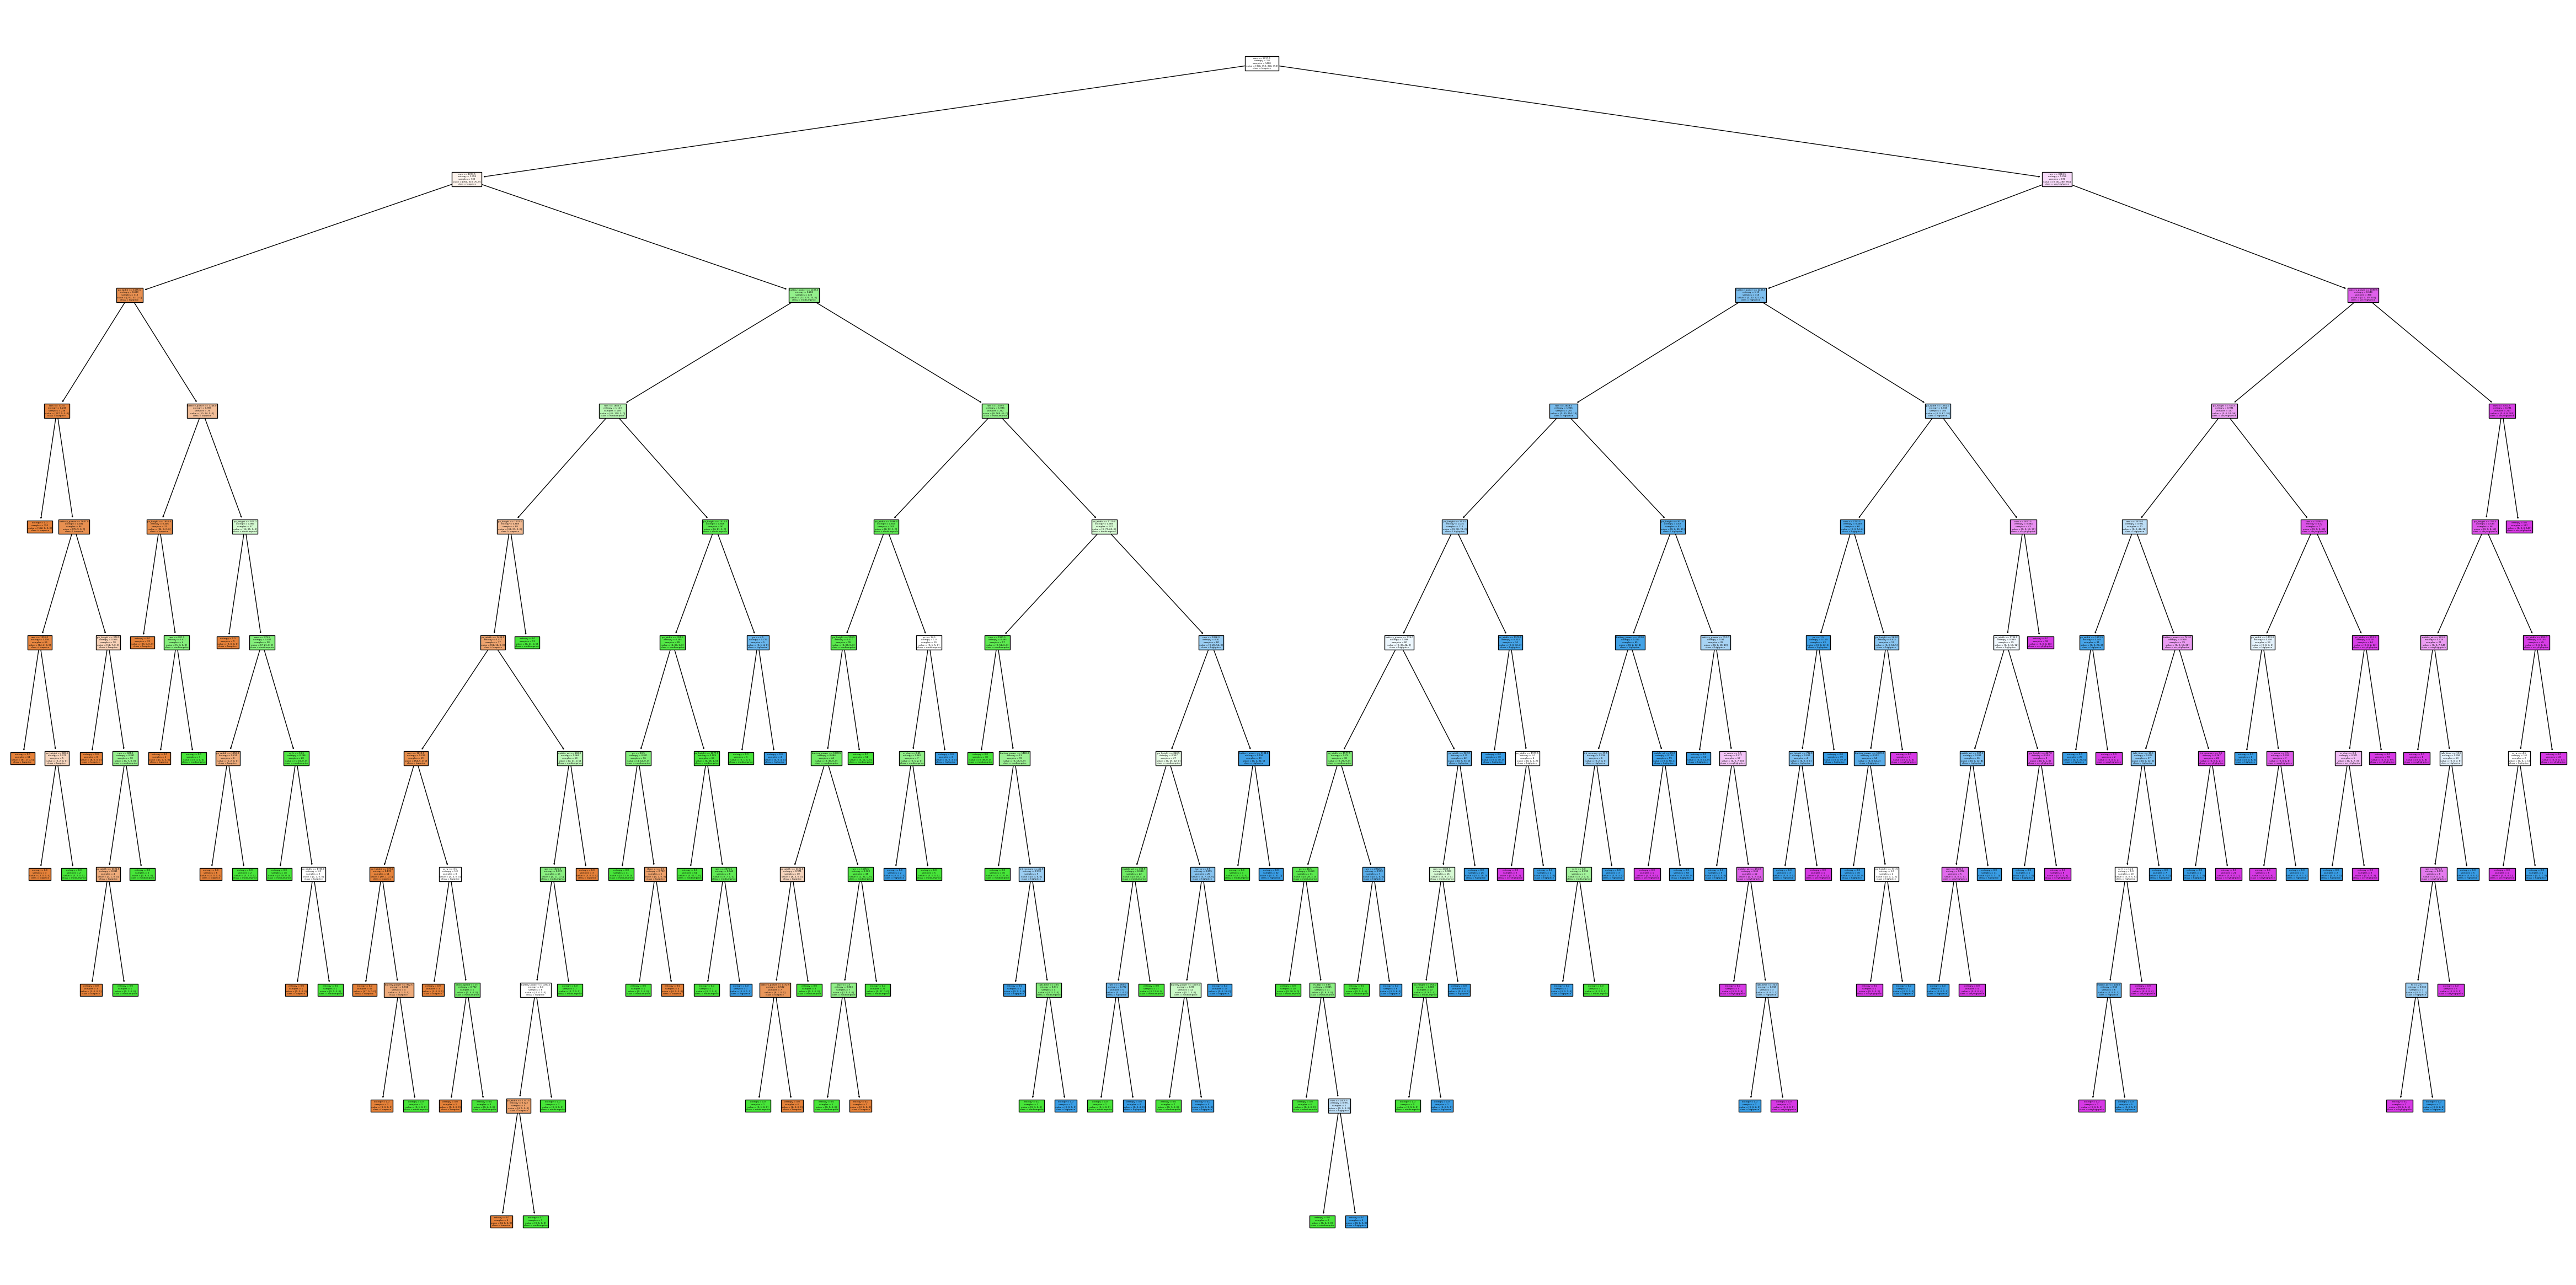

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(tree, feature_names = X.columns,class_names=['lowprice','mediumprice','highprice', 'veryhighprice'],filled=True);

We can see the Accuracy is 1 i.e., It remembers all the training set observations 

In [56]:
# Let's see on the Train set Test set accuracies :
y_pred_train=tree_model.predict(X_train)
y_pred_test=tree_model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [58]:
# Classification Report :
print("Test set:\n",classification_report(y_test,y_pred_test))

Test set:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       150
           1       0.85      0.83      0.84       150
           2       0.77      0.79      0.78       150
           3       0.89      0.86      0.87       150

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [59]:
print("Train set Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test set Accuracy :",accuracy_score(y_test,y_pred_test))

Train set Accuracy: 1.0
Test set Accuracy : 0.86


As we can observe that the Trains set accuracy is 1 and it is dropped upto 0.85 so the model is overfitting.

confusion Matrices for Train and Test sets :

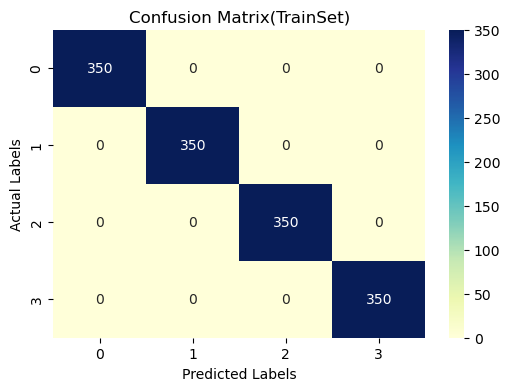

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(TrainSet)")
plt.show()

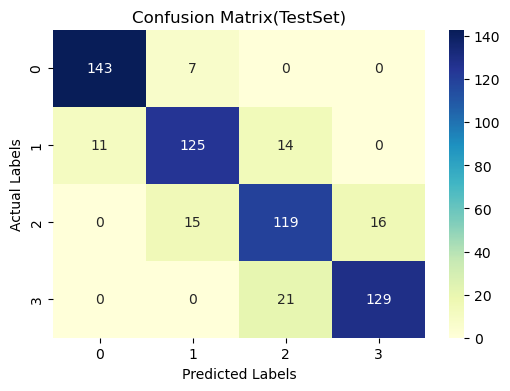

In [61]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(TestSet)")
plt.show()

We built a model using all the Features available, Now we do Feature selection based on the precision Scores.

In [62]:
from sklearn.feature_selection import RFECV

In [63]:
rfecv1=RFECV(estimator=tree,cv=4,scoring="precision_macro",n_jobs=-1)
rfecv2=RFECV(estimator=tree,cv=4,scoring="recall_macro",n_jobs=-1)
rfecv3=RFECV(estimator=tree,cv=4,scoring="f1_macro",n_jobs=-1)

In [64]:
%%time
rfecv1.fit(X_train,y_train)

Wall time: 1.88 s


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
      scoring='precision_macro')

In [65]:
%%time
rfecv2.fit(X_train,y_train)

Wall time: 321 ms


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
      scoring='recall_macro')

In [66]:
%%time
rfecv3.fit(X_train,y_train)

Wall time: 310 ms


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
      scoring='f1_macro')

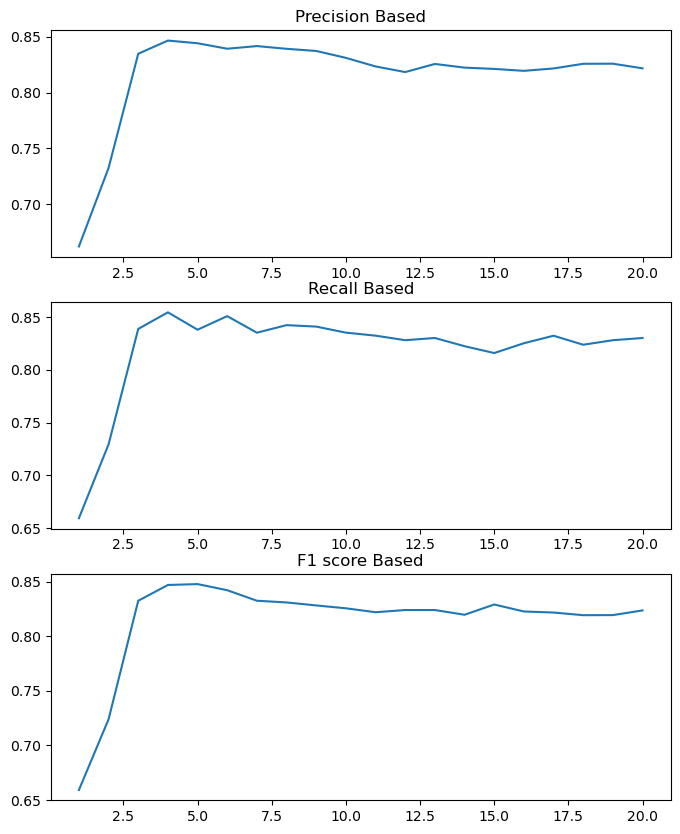

In [67]:
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.plot(range(1,X_train.shape[1]+1),rfecv1.grid_scores_)
plt.title("Precision Based")

plt.subplot(3,1,2)
plt.plot(range(1,X_train.shape[1]+1),rfecv2.grid_scores_)
plt.title("Recall Based")

plt.subplot(3,1,3)
plt.plot(range(1,X_train.shape[1]+1),rfecv3.grid_scores_)
plt.title("F1 score Based")
plt.show()

In [68]:
print("Pecision Based :",rfecv1.n_features_)
print("Recall Based   :",rfecv2.n_features_)
print("F1 score Based :",rfecv3.n_features_)

Pecision Based : 4
Recall Based   : 4
F1 score Based : 5


We can observe from the plots above the best scores are given at 4 let's select 10 features for stability

In [69]:
from sklearn.feature_selection import RFE

In [70]:
rfe=RFE(estimator=tree,n_features_to_select=10)

In [71]:
%%time
rfe.fit(X_train,y_train)

Wall time: 99.3 ms


RFE(estimator=DecisionTreeClassifier(criterion='entropy'),
    n_features_to_select=10)

In [72]:
cols=X_train.columns[rfe.support_]
cols

Index(['battery_power', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'talk_time'],
      dtype='object')

In [73]:
X_train=X_train[cols]
X_test=X_test[cols]
print("Train cols :",X_train.shape[1])
print("Test cols :",X_test.shape[1])

Train cols : 10
Test cols : 10


In [74]:
# let's build a Model for the selected Features :
treeftrs=tree.fit(X_train,y_train)
treeftrs.score(X_train,y_train)

1.0

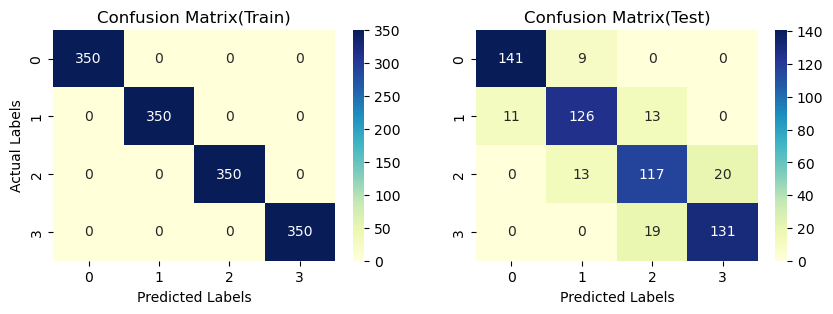

In [75]:
# Confusion Matrices for Train and Test sets :
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,treeftrs.predict(X_train)),cmap='YlGnBu',annot=True,fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)")


plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,treeftrs.predict(X_test)),cmap='YlGnBu',annot=True,fmt='d')
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix(Test)")
plt.show()

Classification Reports for Train and Test sets :

In [76]:
print("Train set :\n",classification_report(y_train,treeftrs.predict(X_train)))
print("----------------------------------------------------------------------------")
print("Test set\n",classification_report(y_test,treeftrs.predict(X_test)))

Train set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       350
           3       1.00      1.00      1.00       350

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

----------------------------------------------------------------------------
Test set
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       150
           1       0.85      0.84      0.85       150
           2       0.79      0.78      0.78       150
           3       0.87      0.87      0.87       150

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



Train and Test set Accuracies :

In [77]:
print("Train set :",accuracy_score(y_train,treeftrs.predict(X_train)))
print("Test set  :",accuracy_score(y_test,treeftrs.predict(X_test)))

Train set : 1.0
Test set  : 0.8583333333333333


There is no much variation is observed from the classification reports before and after the Feature selection.

Cross Validation on Test set :

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
cross_val_score(estimator=treeftrs,X=X_train,y=y_train,cv=5,n_jobs=-1,scoring='precision_macro')

array([0.86404848, 0.80139319, 0.82915305, 0.84762346, 0.87545956])

In [80]:
cross_val_score(estimator=treeftrs,X=X_train,y=y_train,cv=5,n_jobs=-1,scoring='recall_macro')

array([0.85714286, 0.78928571, 0.84642857, 0.82142857, 0.86785714])

In [81]:
cross_val_score(estimator=treeftrs,X=X_train,y=y_train,cv=5,n_jobs=-1,scoring='f1_macro')

array([0.86054422, 0.77441014, 0.83587529, 0.84002088, 0.87548153])

It is showing approx 83% for all scores used in cross validation scheme 

Let's do Hyperparameter Tuning Using Grid-Search CV :

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
params= {'max_depth':range(3,9,1),
        'min_samples_split':[3,5,7,8,9,10,12,13],
        'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
        'max_features':["sqrt","log2",'None']}

In [84]:
gcv=GridSearchCV(treeftrs,param_grid=params,n_jobs=-1,verbose=1,return_train_score=True)

In [85]:
%%time
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Wall time: 10.7 s


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
             param_grid={'max_depth': range(3, 9),
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 5, 7, 8, 9, 10, 12, 13]},
             return_train_score=True, verbose=1)

In [86]:
gcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=5, min_samples_split=13)

In [87]:
gcv.best_score_

0.7714285714285715

In [88]:
gcv.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 13}

In [89]:
dctree=gcv.best_estimator_

In [90]:
dcmodel=dctree.fit(X_train,y_train)

In [91]:
print("Train Set :",dcmodel.score(X_train,y_train))
print("Test  Set :",dcmodel.score(X_test,y_test))

Train Set : 0.7914285714285715
Test  Set : 0.67


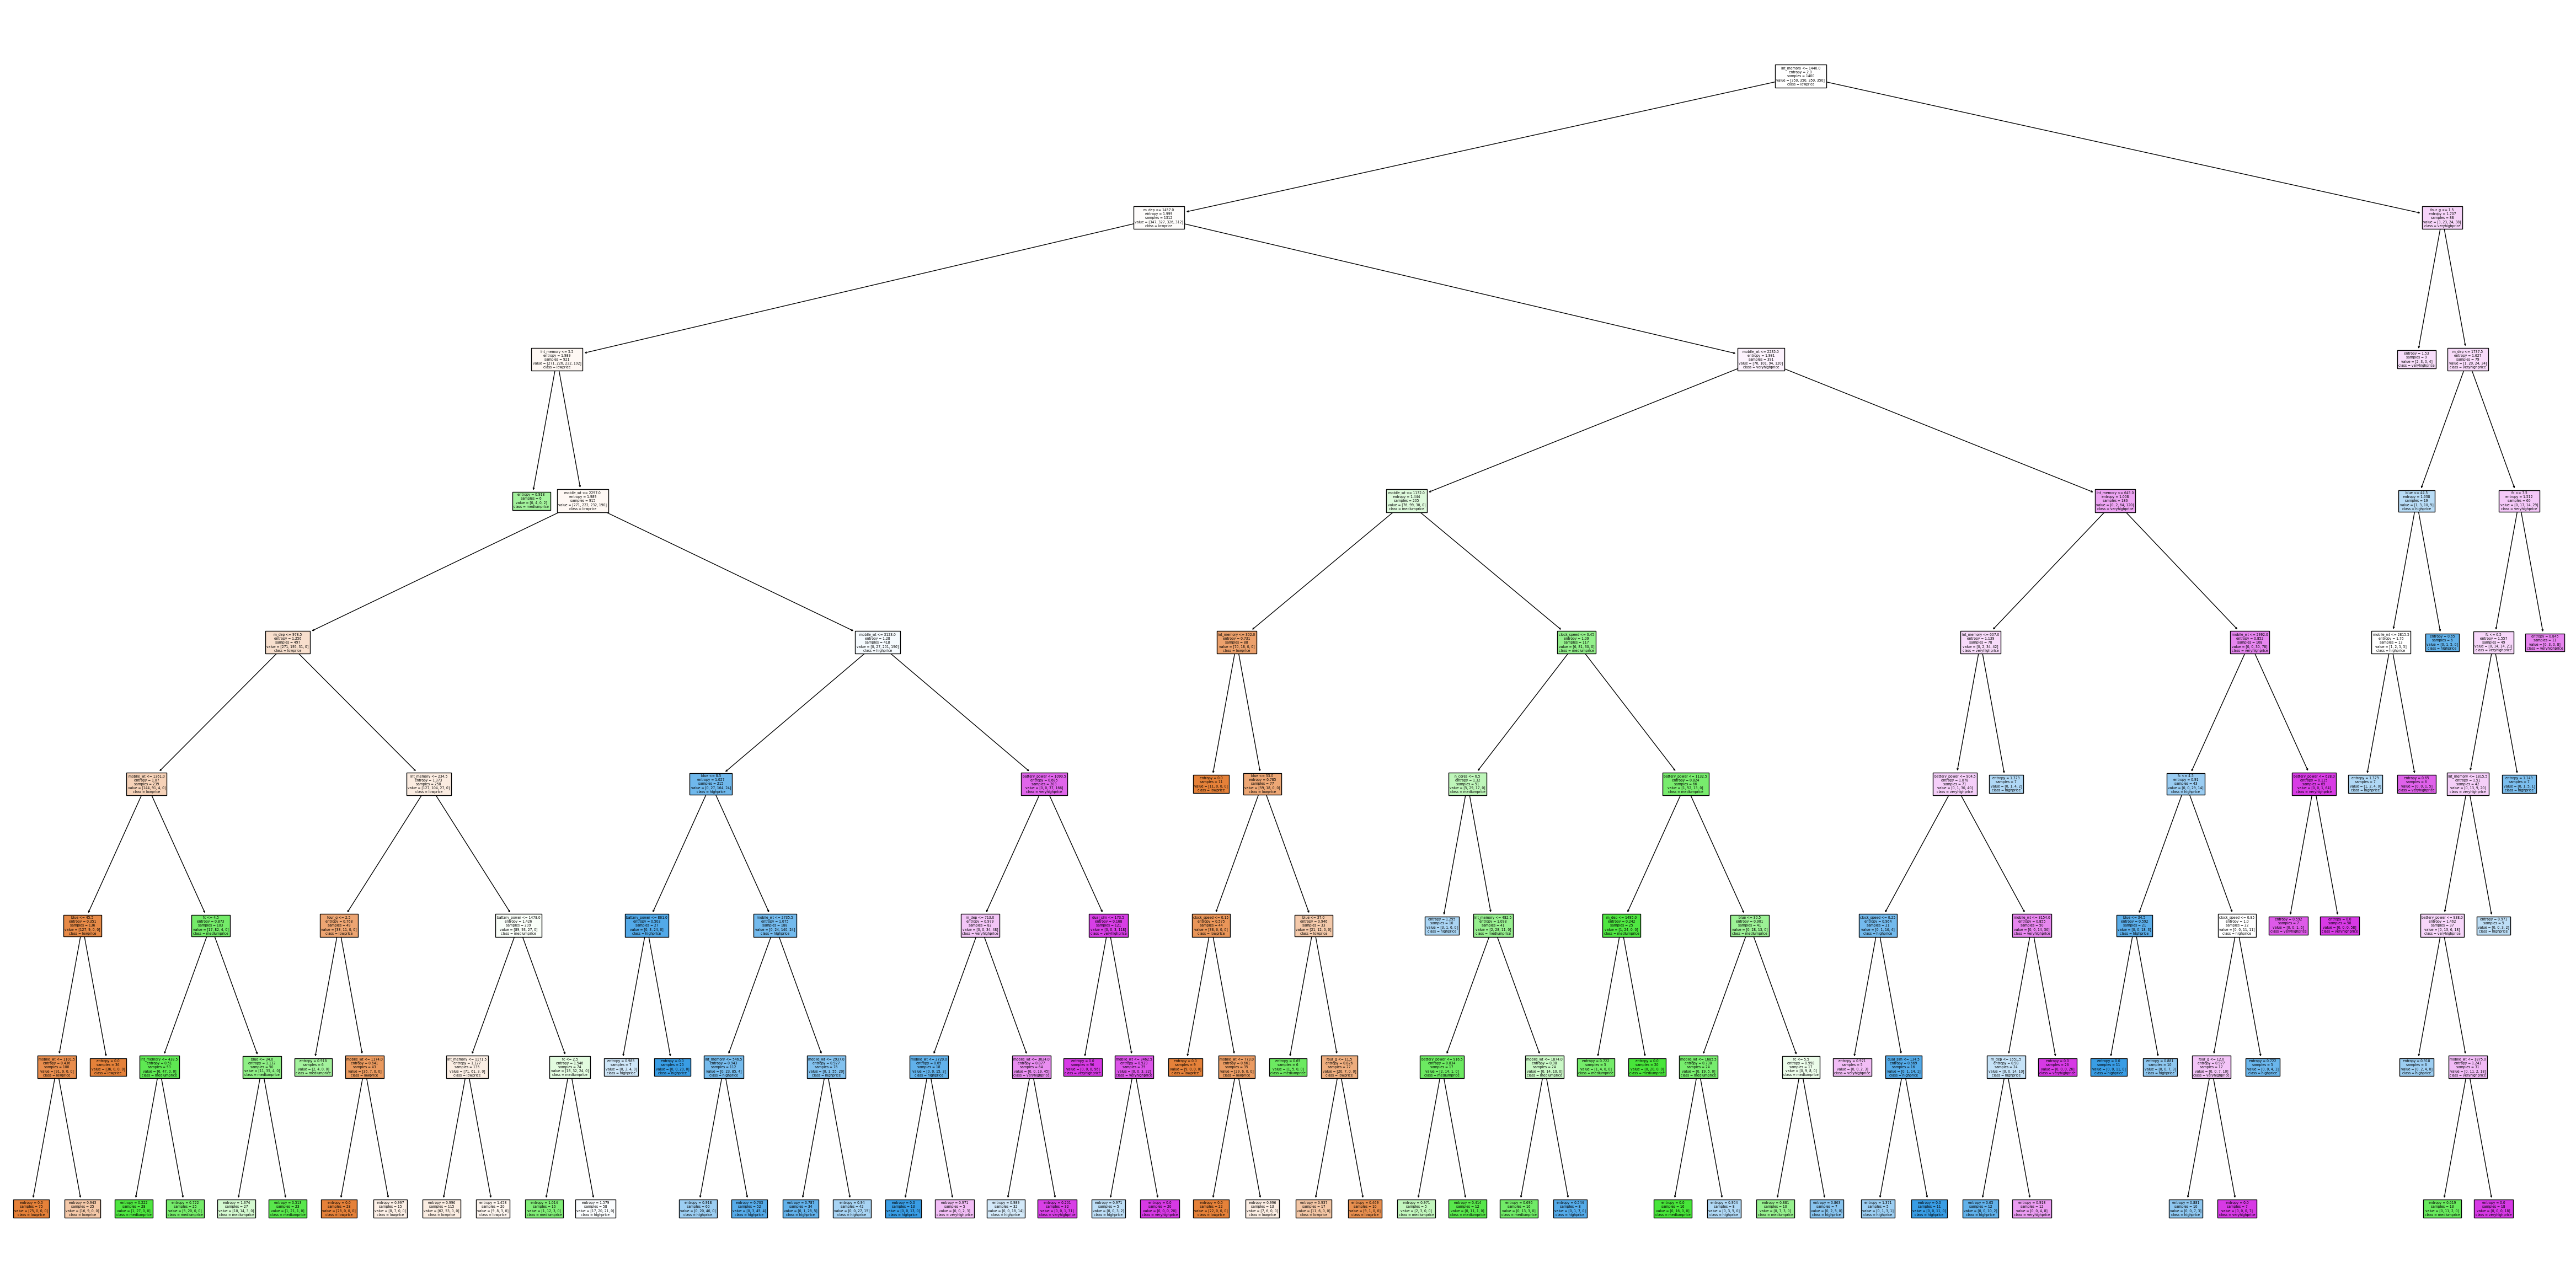

In [92]:
plt.figure(figsize=(60,30))
plot_tree(dcmodel, feature_names = X.columns,class_names=['lowprice','mediumprice','highprice', 'veryhighprice'],filled=True);

This is the tree obtained based on the Best-Estimator by using the Result of the Grid Search CV.

Let's Explore Each Hyperparameter :

In [93]:
cvdf=pd.DataFrame(gcv.cv_results_)
cvdf.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000000      0.000000         0.001605        0.003211   
1       0.003200      0.003919         0.001600        0.003200   
2       0.009680      0.003360         0.000000        0.000000   
3       0.004766      0.003903         0.001459        0.002458   
4       0.002726      0.003354         0.001801        0.003127   
5       0.006400      0.003200         0.000000        0.000000   
6       0.001600      0.003200         0.001600        0.003200   
7       0.005900      0.003105         0.001600        0.003200   
8       0.004102      0.005221         0.001751        0.003027   
9       0.003552      0.003966         0.001602        0.003203   

  param_max_depth param_max_features param_min_samples_leaf  \
0               3               sqrt                      2   
1               3               sqrt                      2   
2               3               sqrt                      2   
3               3               sqrt                      2   
4               3               sqrt                      2   
5               3               sqrt                      2   
6               3               sqrt                      2   
7               3               sqrt                      2   
8               3               sqrt                      3   
9               3               sqrt                      3   

  param_min_samples_split                                             params  \
0                       3  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
1                       5  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
2                       7  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
3                       8  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
4                       9  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
5                      10  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
6                      12  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
7                      13  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
8                       3  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   
9                       5  {'max_depth': 3, 'max_features': 'sqrt', 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.614286           0.432143           0.307143           0.525000   
1           0.607143           0.521429           0.503571           0.667857   
2           0.525000           0.725000           0.696429           0.767857   
3           0.403571           0.492857           0.717857           0.328571   
4           0.410714           0.260714           0.332143           0.589286   
5           0.335714           0.389286           0.800000           0.689286   
6           0.671429           0.432143           0.803571           0.675000   
7           0.660714           0.514286           0.550000           0.564286   
8           0.346429           0.335714           0.800000           0.332143   
9           0.403571           0.442857           0.635714           0.621429   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.300000         0.435714        0.122329              841   
1           0.664286         0.592857        0.069289              534   
2           0.721429         0.687143        0.084261              156   
3           0.421429         0.472857        0.133183              802   
4           0.310714         0.380714        0.114945              861   
5           0.560714         0.555000        0.175293              650   
6           0.646429         0.645714        0.120043              333   
7           0.510714         0.560000        0.054370              634   
8           0.278571         0.418571        0.192160              849   
9           0.646429         0.550000        0.104564     

In [94]:
cols=['param_max_depth','param_max_features','param_min_samples_leaf','param_min_samples_split',
      'mean_test_score','rank_test_score','mean_train_score']
cvdf=cvdf[cols]
cvdf.head(10)

param_max_depth param_max_features param_min_samples_leaf  \
0               3               sqrt                      2   
1               3               sqrt                      2   
2               3               sqrt                      2   
3               3               sqrt                      2   
4               3               sqrt                      2   
5               3               sqrt                      2   
6               3               sqrt                      2   
7               3               sqrt                      2   
8               3               sqrt                      3   
9               3               sqrt                      3   

  param_min_samples_split  mean_test_score  rank_test_score  mean_train_score  
0                       3         0.435714              841          0.475179  
1                       5         0.592857              534          0.621429  
2                       7         0.687143              156          0.715536  
3                       8         0.472857              802          0.496250  
4                       9         0.380714              861          0.427679  
5                      10         0.555000              650          0.563214  
6                      12         0.645714              333          0.653571  
7                      13         0.560000              634          0.568571  
8                       3         0.418571              849          0.432679  
9                       5         0.550000              663          0.586429

In [95]:
cvdf.sort_values(by='rank_test_score').head(20)

param_max_depth param_max_features param_min_samples_leaf  \
1183               8               log2                      5   
684                6               sqrt                      6   
1127               8               sqrt                      7   
993                7               log2                      9   
1111               8               sqrt                      5   
1134               8               sqrt                      8   
925                7               sqrt                      9   
1130               8               sqrt                      8   
1205               8               log2                      8   
1198               8               log2                      7   
958                7               log2                      4   
1092               8               sqrt                      3   
1094               8               sqrt                      3   
870                7               sqrt                      2   
1189               8               log2                      6   
864                7               sqrt                      2   
986                7               log2                      8   
988                7               log2                      8   
435                5               sqrt                      2   
905                7               sqrt                      7   

     param_min_samples_split  mean_test_score  rank_test_score  \
1183                      13         0.771429                1   
684                        9         0.768571                2   
1127                      13         0.757143                3   
993                        5         0.755714                4   
1111                      13         0.755000                5   
1134                      12         0.755000                5   
925                       10         0.754286                7   
1130                       7         0.754286                7   
1205                      10         0.754286                7   
1198                      12         0.752143               10   
958                       12         0.750714               11   
1092                       9         0.750714               12   
1094                      12         0.749286               13   
870                       12         0.745714               14   
1189                      10         0.745714               15   
864                        3         0.744286               16   
986                        7         0.743571               17   
988                        9         0.742143               18   
435                        8         0.740000               19   
905                        5         0.738571               20   

      mean_train_score  
1183          0.892500  
684           0.829286  
1127          0.864643  
993           0.850000  
1111          0.880714  
1134          0.864464  
925           0.828214  
1130          0.855179  
1205          0.850000  
1198          0.853571  
958           0.864643  
1092          0.879643  
1094          0.882857  
870           0.853750  
1189          0.861786  
864           0.877679  
986           0.849464  
988           0.831071  
435           0.793929  
905           0.837143

We can see that for the top 20 observations the Mean_Train_score is approx 85% and the Mean_Test_Score is approx 73%

In [96]:
dpth=cvdf.groupby('param_max_depth').mean()
dpth=dpth.reset_index()
dpth

param_max_depth  mean_test_score  rank_test_score  mean_train_score
0                3         0.507391       850.175926          0.535387
1                4         0.554509       764.981481          0.599965
2                5         0.603953       734.023148          0.671265
3                6         0.638869       630.375000          0.729809
4                7         0.666677       487.310185          0.781586
5                8         0.687232       421.157407          0.816442

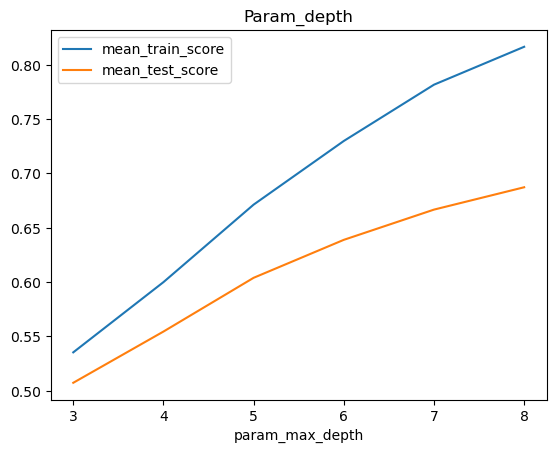

In [97]:
dpth.plot.line(x='param_max_depth',y=['mean_train_score','mean_test_score'])
plt.title("Param_depth")
plt.show()

Here we see that as the depth increases the mean scores also increases. we need to see higher values for depth for stability.
So , we select depth (8,10)

In [98]:
minlf=cvdf.groupby('param_min_samples_leaf').mean()
minlf=minlf.reset_index()
minlf

param_min_samples_leaf  mean_test_score  rank_test_score  mean_train_score
0                       2         0.614338       637.284722          0.698815
1                       3         0.613274       637.652778          0.697143
2                       4         0.613244       631.868056          0.694074
3                       5         0.606131       650.916667          0.686936
4                       6         0.611317       647.138889          0.690115
5                       7         0.609427       653.215278          0.686568
6                       8         0.603579       663.805556          0.679652
7                       9         0.612738       642.854167          0.688817
8                      10         0.603899       667.298611          0.679561

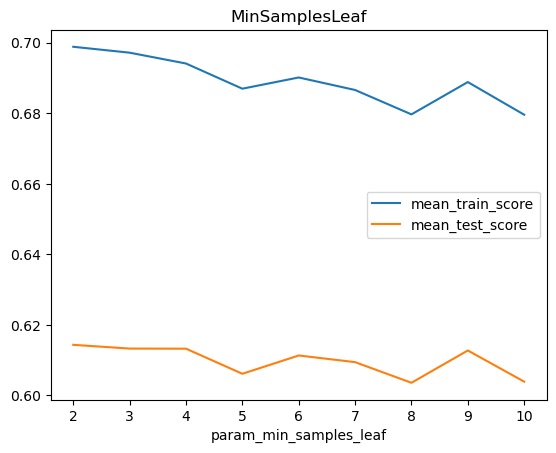

In [99]:
minlf.plot.line(x='param_min_samples_leaf',y=['mean_train_score','mean_test_score'])
plt.title("MinSamplesLeaf")
plt.show()

Here we see that the Mean scores of the Train and Test sets have a zigzag trend. The best estimator given by GridSearchCV is 5
so, by observing the graph above we can select from (4,6)

In [100]:
mnsplit=cvdf.groupby('param_min_samples_split').mean()
mnsplit=mnsplit.reset_index()
mnsplit

param_min_samples_split  mean_test_score  rank_test_score  mean_train_score
0                        3         0.601131       658.703704          0.680357
1                        5         0.609048       649.771605          0.688275
2                        7         0.609577       647.617284          0.690380
3                        8         0.607903       651.345679          0.687358
4                        9         0.617712       629.308642          0.695762
5                       10         0.608988       647.790123          0.688309
6                       12         0.612811       646.796296          0.691677
7                       13         0.611005       652.697531          0.690488

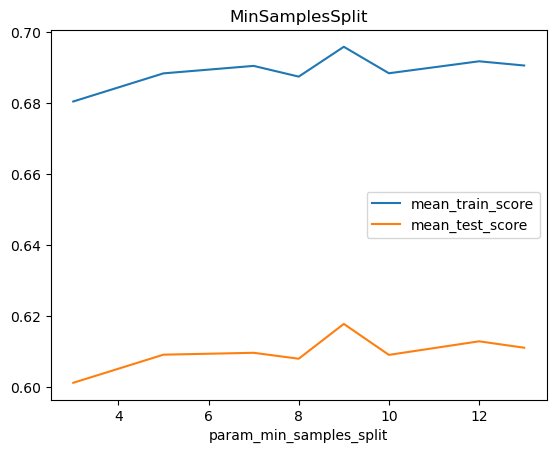

In [101]:
mnsplit.plot.line(x='param_min_samples_split',y=['mean_train_score','mean_test_score'])
plt.title("MinSamplesSplit")
plt.show()

Here we observe that Mean Test and Train scores are somewhat stable around we can see (5,8)

Fine Tuning the Parameters :

In [102]:
params= {'max_depth':range(8,10,1),
        'min_samples_split':[5,6,7,8],
        'min_samples_leaf':[4,5,6],
        'criterion':['gini','entropy']}

In [103]:
gcv=GridSearchCV(treeftrs,param_grid=params,n_jobs=-1,verbose=1,return_train_score=True)

In [104]:
%%time
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Wall time: 808 ms


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 10),
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [5, 6, 7, 8]},
             return_train_score=True, verbose=1)

In [105]:
dctree=gcv.best_estimator_
dctree

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=8)

In [106]:
dctree.fit(X_train,y_train)
print("Train score :",dctree.score(X_train,y_train))

Train score : 0.9628571428571429


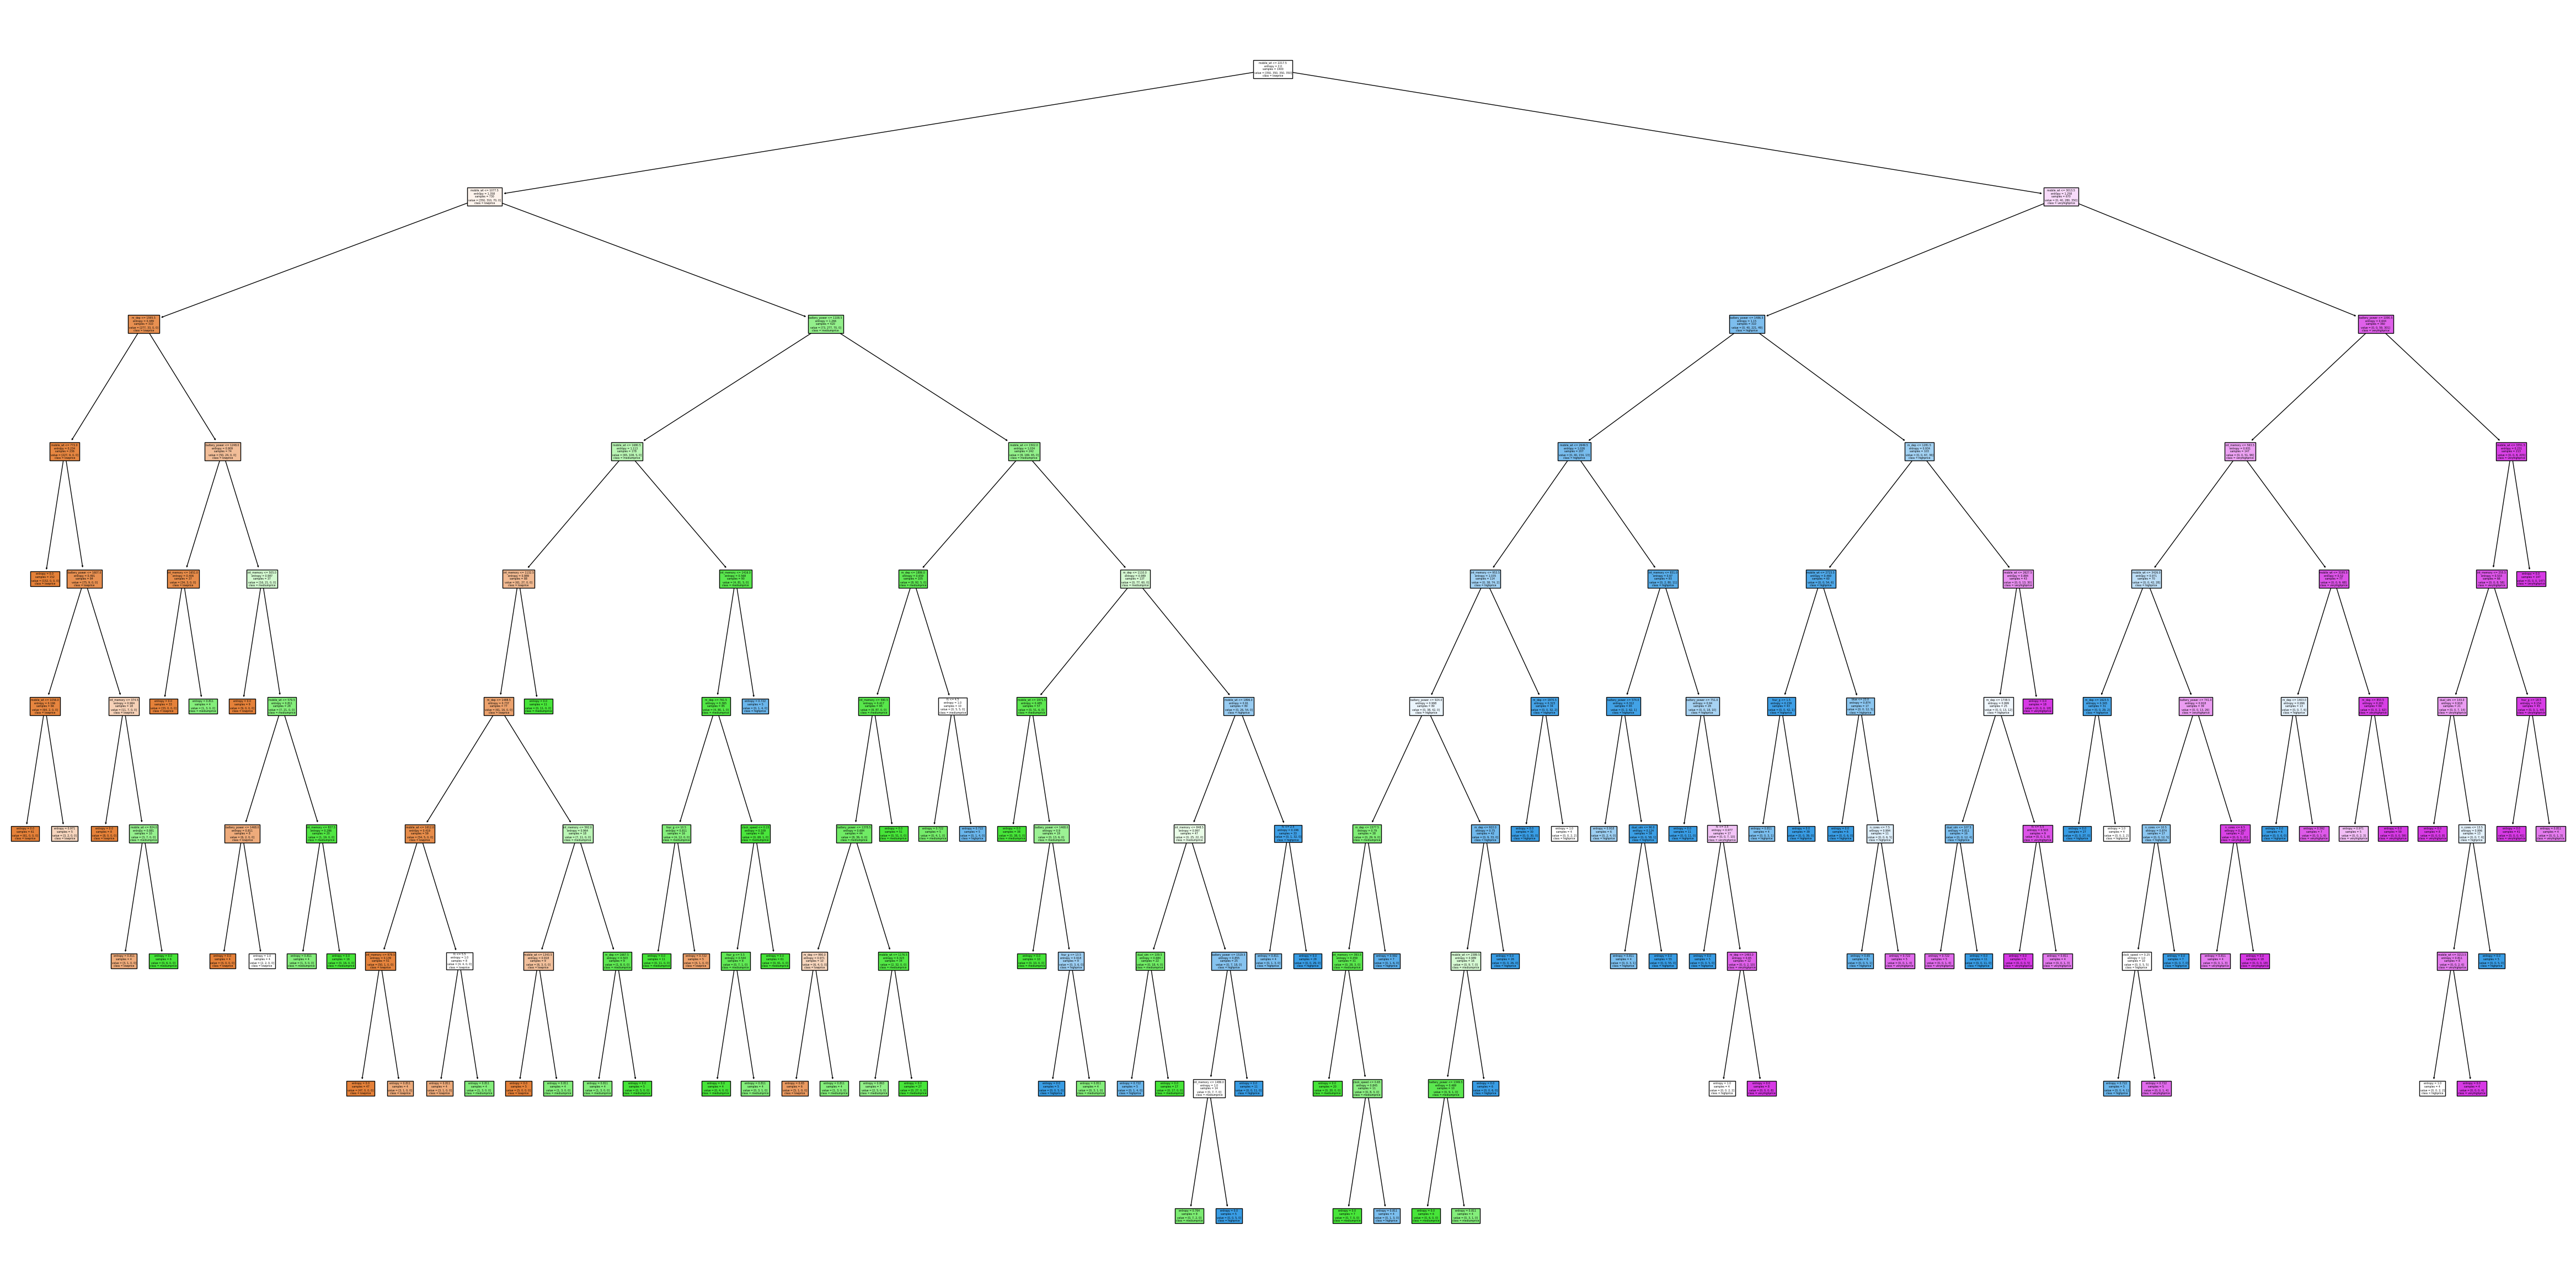

In [107]:
plt.figure(figsize=(60,30))
plot_tree(dctree, feature_names = X.columns,class_names=['lowprice','mediumprice','highprice', 'veryhighprice'],filled=True);

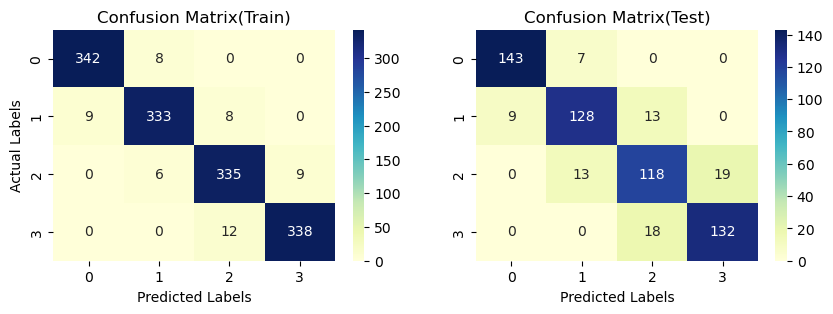

In [108]:
# Confusion Matrices for Train and Test sets :
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,dctree.predict(X_train)),cmap='YlGnBu',annot=True,fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)")


plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,dctree.predict(X_test)),cmap='YlGnBu',annot=True,fmt='d')
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix(Test)")
plt.show()

In [109]:
print("Train Set :",dctree.score(X_train,y_train))
print("Test  Set :",dctree.score(X_test,y_test))

Train Set : 0.9628571428571429
Test  Set : 0.8683333333333333


We see that the difference between the Train and Test sets accuracy is slightly reduced compared to the previous models.

In [110]:
# cross-validation :
cross_val_score(estimator=dctree,X=X_train,y=y_train,cv=5,n_jobs=-1)

array([0.84642857, 0.80357143, 0.83928571, 0.81428571, 0.86785714])

We see that the Model score is 84% so itseems to be stable.

In [111]:
print("Train set :\n",classification_report(y_train,dctree.predict(X_train)))
print("----------------------------------------------------------------------------")
print("Test set\n",classification_report(y_test,dctree.predict(X_test)))

Train set :
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       350
           1       0.96      0.95      0.96       350
           2       0.94      0.96      0.95       350
           3       0.97      0.97      0.97       350

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400

----------------------------------------------------------------------------
Test set
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       150
           1       0.86      0.85      0.86       150
           2       0.79      0.79      0.79       150
           3       0.87      0.88      0.88       150

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [112]:
cols=  ['battery_power', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'talk_time']
X=test[cols]
X.shape

(1000, 10)

In [113]:
y_pred=dctree.predict(X)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
pd.DataFrame(y_pred).to_excel(r"MobilePricePredictions.xlsx")
print('Predicted values is written to Excel File successfully.')

Predicted values is written to Excel File successfully.


      --------------------------------------------------------------------------------------------------------------

### Conclusion :
* Feature selection is done using Recursive Feature Elimination Cross Validation.
* Cross validation scheme is used to check whether the Model is stable or not.
* Hyper-parameter tuning is done using Grid Search CV.
* After doing Coarse tuning Fine tuning is done based on analysis of individual Hyper-parameter.
* Finally we predicted the Test set based on the selected Model.